# Insurance Charges Analysis

## Table of Contents

1. [**Introduction**](#Introduction)
   - [Goals of Analysis](#Goals-of-Analysis)
   - [Import Dependencies](#Import-Dependencies)

2. [**Data Import and Initial Inspection**](#Data-Import-and-Initial-Inspection)
   - [Dataset Overview](#Dataset-Overview)
   - [Initial Analysis](#Initial-Analysis)

3. [**Correlation Matrix Heatmap Analysis**](#Correlation-Matrix-Heatmap-Analysis)
   - [Understanding Correlation](#Understanding-Correlation)
   - [Interpretation with LaTeX Formulas](#Interpretation-with-LaTeX-Formulas)
   - [Conclusion of Correlation Analysis](#Conclusion-of-Correlation-Analysis)

4. [**Distribution Analysis of Insurance Charges**](#Distribution-Analysis-of-Insurance-Charges)
   - [Histograms and Transformations](#Histograms-and-Transformations)
   - [Interpretation and Conclusion](#Interpretation-and-Conclusion)

5. [**Relationship Analysis by Smoking Status and Sex**](#Relationship-Analysis-by-Smoking-Status-and-Sex)
   - [Age, BMI, Children, and Charges by Smoking Status](#Age-BMI-Children-and-Charges-by-Smoking-Status)
   - [Age, BMI, Children, and Charges by Sex](#Age-BMI-Children-and-Charges-by-Sex)

6. [**Impact of BMI on Insurance Charges**](#Impact-of-BMI-on-Insurance-Charges)
   - [BMI and Charges by Smoking Status](#BMI-and-Charges-by-Smoking-Status)
   - [BMI and Number of Children](#BMI-and-Number-of-Children)

7. [**Specific Analyses of Charges**](#Specific-Analyses-of-Charges)
   - [Health Charges by Age and Smoking Status](#Health-Charges-by-Age-and-Smoking-Status)
   - [Impact of Smoking Differentiated by BMI](#Impact-of-Smoking-Differentiated-by-BMI)

8. [**Distribution Analyses**](#Distribution-Analyses)
   - [Age Distribution of Beneficiaries](#Age-Distribution-of-Beneficiaries)
   - [Normality Assessment of Charges](#Normality-Assessment-of-Charges)

9. [**Average Charges Analysis**](#Average-Charges-Analysis)
   - [Average Charges by Smoking Status](#Average-Charges-by-Smoking-Status)
   - [Average Charges by Number of Children](#Average-Charges-by-Number-of-Children)

10. [**Charges Distribution by Demographics**](#Charges-Distribution-by-Demographics)
    - [Distribution by Gender](#Distribution-by-Gender)
    - [Distribution Across Regions](#Distribution-Across-Regions)

11. [**Impact of Smoking and Regional Differences**](#Impact-of-Smoking-and-Regional-Differences)
    - [Impact of Smoking by Gender](#Impact-of-Smoking-by-Gender)
    - [Regional Differences by Gender](#Regional-Differences-by-Gender)

12. [**Boxplot Analyses**](#Boxplot-Analyses)
    - [Impact of Smoking on Charges](#Impact-of-Smoking-on-Charges)
    - [Gender Disparity in Charges](#Gender-Disparity-in-Charges)

13. [**Advanced Boxplot Analyses**](#Advanced-Boxplot-Analyses)
    - [Smoking Impact by Gender](#Smoking-Impact-by-Gender)
    - [Charges Across Regions](#Charges-Across-Regions)
    - [Charges by Number of Children](#Charges-by-Number-of-Children)

14. [**BMI Category Analyses**](#BMI-Category-Analyses)
    - [Impact of BMI Categories on Charges](#Impact-of-BMI-Categories-on-Charges)
    - [Average Charges by BMI Category](#Average-Charges-by-BMI-Category)
    - [Charges by BMI Category and Number of Children](#Charges-by-BMI-Category-and-Number-of-Children)
    - [Impact of BMI on Charges for Smokers and Non-Smokers](#Impact-of-BMI-on-Charges-for-Smokers-and-Non-Smokers)

15. [**Analysis and Purpose for Visualizations**](#Analysis-and-Purpose-for-Visualizations)
    - [Key Insights](#Key-Insights)
    - [Purpose of Analysis](#Purpose-of-Analysis)
    - [Final Thoughts](#Final-Thoughts)

16. [**Conclusion**](#Conclusion)
    - [Summary and Implications for Stakeholders](#Summary-and-Implications-for-Stakeholders)
    - [Methodological Approach](#Methodological-Approach)
    - [Future Directions](#Future-Directions)

## Introduction
In this Jupyter Notebook, we'll conduct an exploratory and predictive analysis of insurance charges based on a dataset that includes age, sex, BMI, number of children, smoking status, region, and insurance charges. Our goal is to understand the factors that contribute to insurance costs and predict charges for new customers.

## Import Dependencies

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import LocalOutlierFactor
import pylab

## Data Import and Initial Inspection

We begin our analysis by importing the dataset and taking an initial look at its structure and some basic statistics.

## Dataset Overview
The dataset contains several features that are likely to influence insurance charges:

- `age`: The age of the primary beneficiary.
- `sex`: The gender of the beneficiary, either female or male.
- `bmi`: Body mass index, providing an understanding of body weights that are relatively high or low relative to height.
- `children`: The number of children covered by health insurance / Number of dependents.
- `smoker`: Smoking status of the beneficiary.
- `region`: The beneficiary's residential area in the US.
- `charges`: Individual medical costs billed by health insurance.

In [2]:
data=pd.read_csv("../Data/insurance.csv")
df=data.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Analysis:
The dataset consists of 1338 rows and 7 columns. The features include demographic and health-related characteristics, and the target variable is `charges`, which we will analyze and predict.

In [3]:
print("row :",df.shape[0]," ","column :",df.shape[1])

row : 1338   column : 7


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Descriptive statistics of numerical features indicating the count, mean, standard deviation, and the distribution of values across quartiles.

In [5]:
df.describe(include=["object"]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


Categorical features are summarized with the number of unique entries, the most common entry, and its frequency.

In [6]:
print("Sum of missing values :",df.isnull().sum().sum())

Sum of missing values : 0


In [7]:
df.eq(0).sum()

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

#### Analysis:
There are no zero values for `age`, `bmi`, and `charges`, which makes sense as these are continuous variables where zero would not be a valid entry. However, for `children`, zero is a valid count, indicating no dependents, and is present in 574 entries.

Moving forward, we will explore the relationships between these features and `charges`, using statistical and machine learning methods to understand and predict insurance costs.

The next steps will include cleaning the data, handling missing values if any, and encoding categorical variables for model compatibility. We will also delve into visual EDA to grasp the distributions and relationships visually.

## Correlation Matrix Heatmap Analysis

Visual representation of the Pearson correlation coefficients between numeric variables in the dataset.

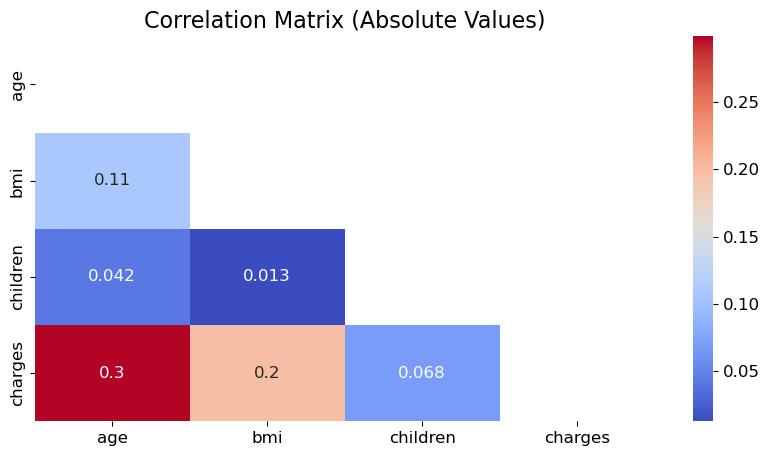

In [8]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr.abs(), annot=True, cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix (Absolute Values)", fontsize=16)
plt.show()


A heatmap with cells representing the correlation between variables. Values close to 1 or -1 indicate strong positive or negative correlation, respectively, while values near 0 indicate no linear relationship.

### Analysis:
In the provided heatmap, we can observe the following:

- `age` and `charges` have a positive correlation of 0.3, suggesting that as age increases, charges tend to increase as well, which is intuitive in healthcare.
- `bmi` and `charges` show a positive correlation of 0.2, indicating that higher BMI might lead to higher insurance charges, potentially due to the increased health risks associated with higher BMI values.
- `children` have a very weak positive correlation with `charges`, suggesting that the number of children has a negligible effect on insurance costs.

#### Interpretation with LaTeX Formulas:
The correlation $ r $ between two variables $ X $ and $ Y $ is calculated using the Pearson correlation coefficient formula:

$ r = \frac{\sum (X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum (X - \bar{X})^2 \sum (Y - \bar{Y})^2}} $

Where:
- $ \bar{X} $ is the mean of $ X $
- $ \bar{Y} $ is the mean of $ Y $

For instance, the positive correlation between `age` and `charges` indicates a relationship that can be modeled as $ Y = \beta_0 + \beta_1X + \epsilon $, where $ Y $ represents charges, $ X $ represents age, $ \beta_0 $ is the intercept, $ \beta_1 $ is the coefficient for age, and $ \epsilon $ is the error term.

#### Conclusion:
Understanding these correlations is crucial in predictive modeling, as they can influence the choice of features to include in a regression model. However, it is important to remember that correlation does not imply causation, and further analysis is required to understand the underlying causal relationships.

---

## Distribution Analysis of Insurance Charges

The pair of histograms provide a comparison of the distribution of insurance charges before and after a logarithmic transformation.

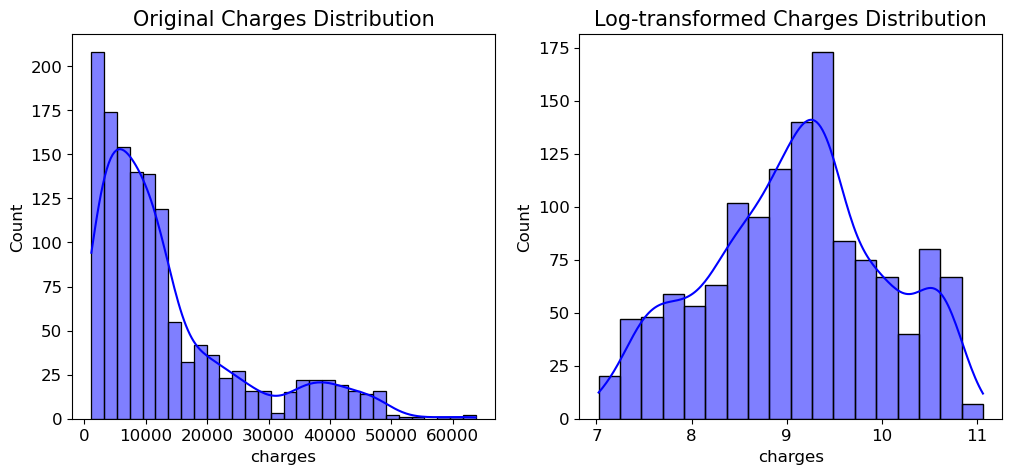

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(df.charges, color="b", kde=True)
plt.title('Original Charges Distribution', size=15)
plt.subplot(122)
sns.histplot(np.log(df.charges), color="b", kde=True)
plt.title('Log-transformed Charges Distribution', size=15)
plt.show()


Two histograms display the distribution of insurance charges: one for the original charges and another for the log-transformed charges, with kernel density estimates overlaid on the histograms.

#### Analysis:
- The left histogram (Original Charges Distribution) shows a right-skewed distribution of insurance charges, indicating that most individuals pay lower charges, but a few pay significantly more, leading to a long tail on the right.
- The right histogram (Log-transformed Charges Distribution) shows the charges distribution after a logarithmic transformation, which appears to follow a more normal distribution, indicating that log transformation can normalize the data.

#### Interpretation with LaTeX Formulas:
The log transformation is a commonly used transformation in data analysis to handle skewed data. It can be expressed as:

$ y' = \log(y) $

Where:
- $ y $ is the original variable
- $ y' $ is the log-transformed variable

For a set of charges $ C $, the log transformation would be $ C' = \log(C) $.

#### Conclusion:
The log transformation's effect on the charges data is significant; it reduces skewness and helps to reveal the underlying normal distribution. This is especially useful in regression analysis, as many statistical models assume that the predictors are normally distributed. The log transformation can thus improve the model's performance by stabilizing the variance and making the data conform more closely to the assumptions underlying many statistical methods.

---

## Relationship Analysis Between Age, BMI, Number of Children, and Insurance Charges by Smoking Status

The pairplot visualizes the relationships between age, BMI, number of children, and insurance charges, differentiated by smoking status.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


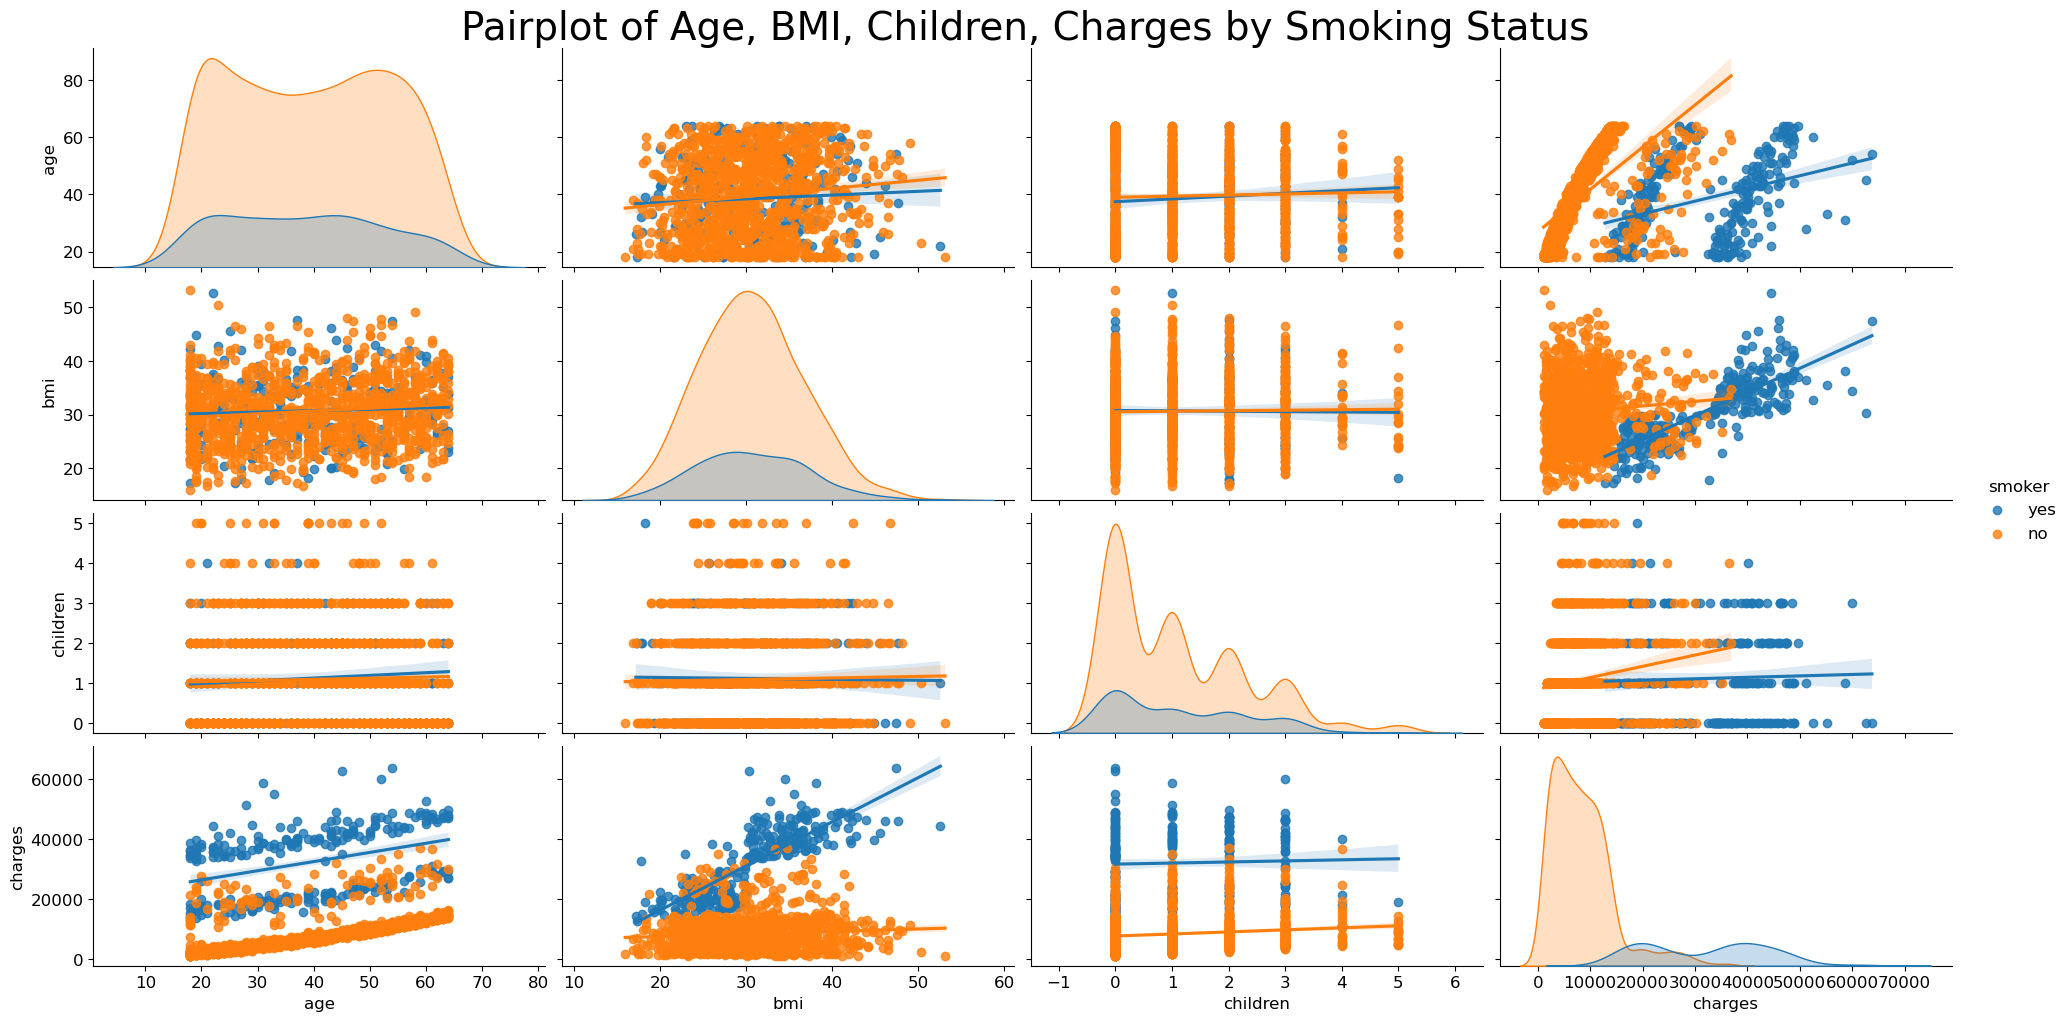

In [10]:
sns.pairplot(df, kind="reg", hue="smoker", aspect=2)
plt.suptitle('Pairplot of Age, BMI, Children, Charges by Smoking Status', size=28, y=1.02)
plt.show()

The pairplot contains a matrix of plots with the variables age, BMI, children, and charges on both the x and y axes. Each plot represents the relationship between two variables, colored by whether the individual is a smoker (yes or no). Regression lines are included in the scatter plots to indicate trends.

#### Analysis:
- The diagonal shows the distribution of each variable with a distinction between smokers and non-smokers.
- The off-diagonal plots are scatter plots for the combination of two different variables. For instance, the plot at the intersection of 'bmi' row and 'charges' column shows the relationship between BMI and insurance charges with a regression line fitted to the data points.
- The hue 'smoker' clearly shows that smokers tend to have higher insurance charges across all ages and BMIs.

#### Interpretation with LaTeX Formulas:
Regression lines in the scatter plots are based on the linear regression model:

$ y = \beta_0 + \beta_1x $

Where:
- $ y $ represents the dependent variable (e.g., insurance charges).
- $ \beta_0 $ is the y-intercept of the regression line.
- $ \beta_1 $ is the slope of the regression line, representing the effect on $ y $ for each unit increase in $ x $ (e.g., BMI, age).
- $ x $ represents the independent variable.

In this context, the pairplot may suggest a model for insurance charges ($ y $) as a function of age, BMI, and the number of children ($ x $ variables), with the smoking status as a categorical variable affecting the slope and intercept.

#### Conclusion:
This pairplot presents overview of the relationships and distributions of key variables in the dataset. It highlights the influence of smoking status on insurance charges and the varying relationships between charges and other factors such as age and BMI.

---

## Relationship Analysis Between Age, BMI, Number of Children, and Insurance Charges by Sex

The pairplot showcases the interrelations among age, BMI, children, and charges, categorized by sex.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


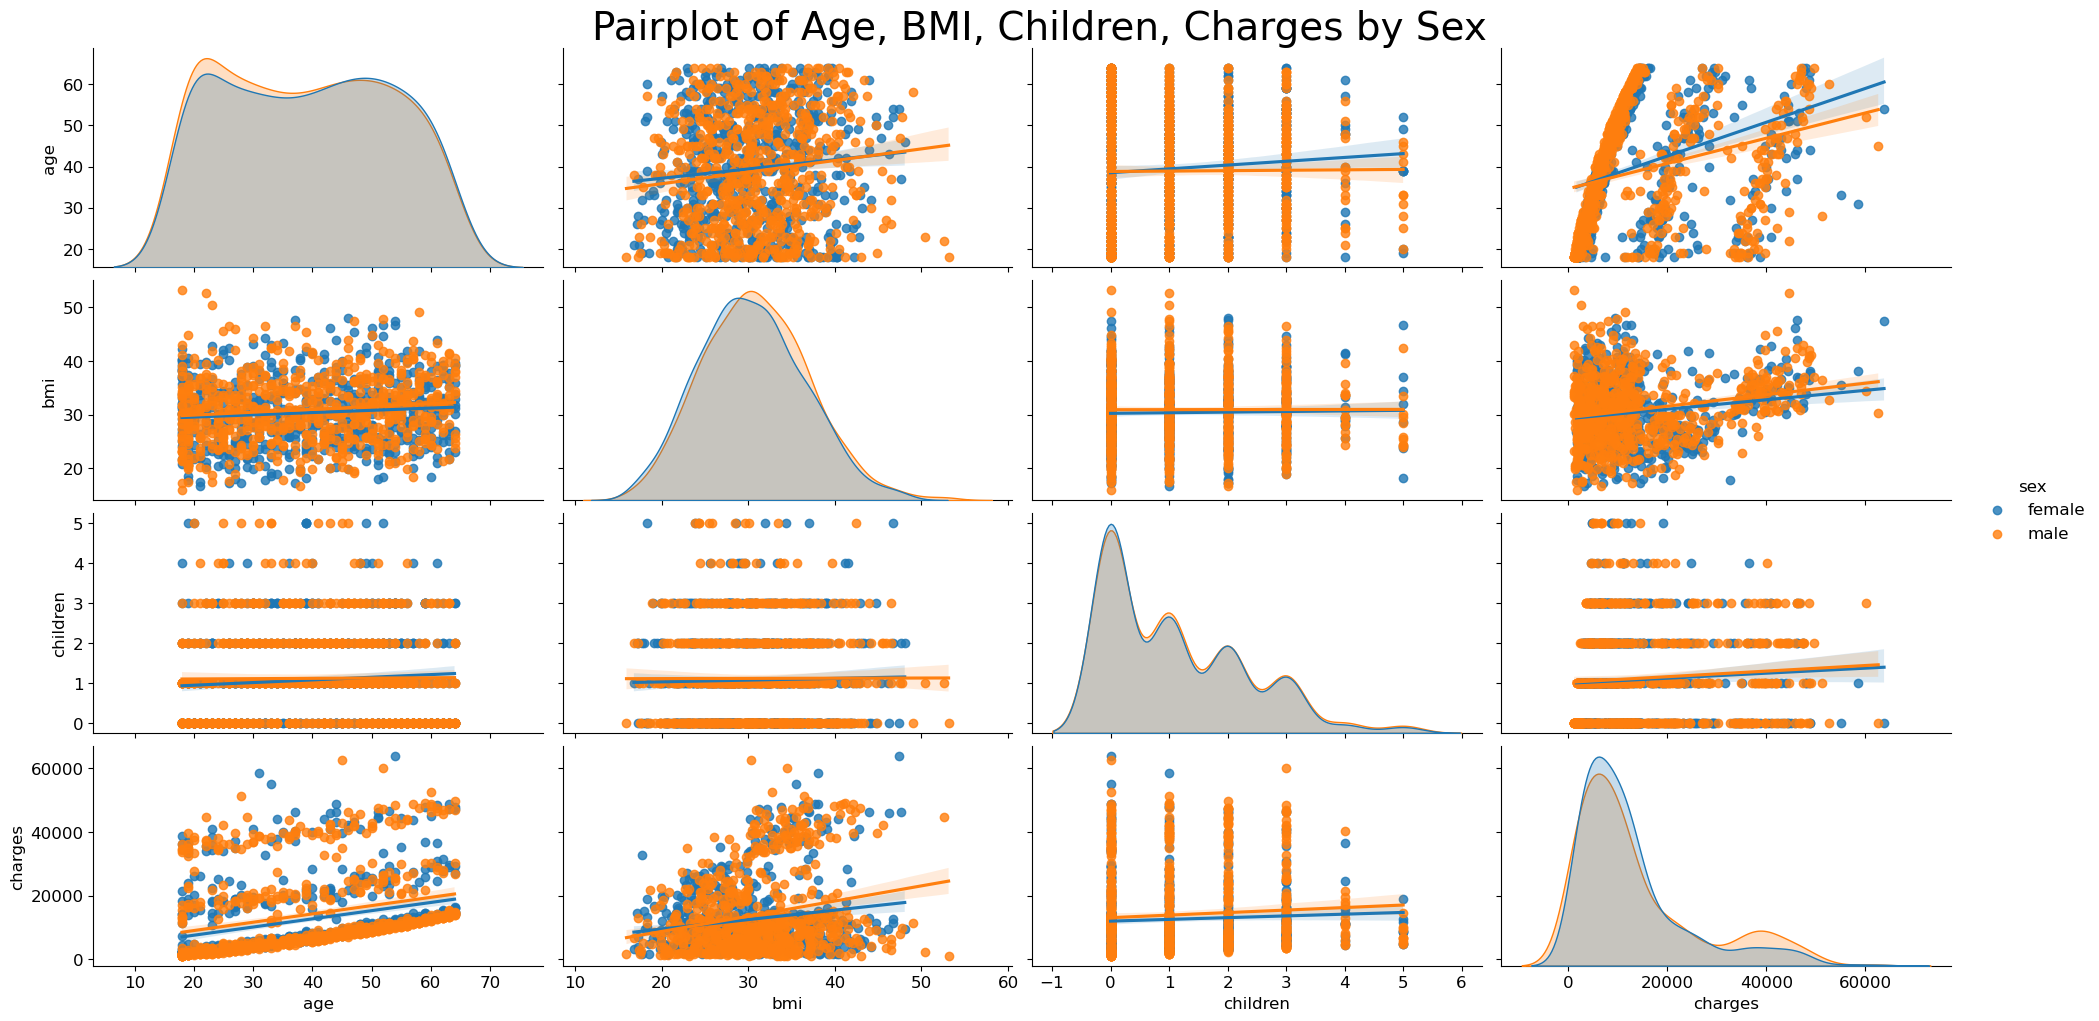

In [11]:
sns.pairplot(df, kind="reg", hue="sex", aspect=2)
plt.suptitle('Pairplot of Age, BMI, Children, Charges by Sex', size=28, y=1.02)
plt.show()

This pairplot creates a grid of axes such that each variable in the data will be shared across the y-axes across a single row and the x-axes across a single column. The diagonals provide the distribution of each variable segregated by sex, using color-coding.

#### Analysis:
- Diagonal plots: They display the distribution of each individual variable for male and female, allowing for a visual comparison.
- Off-diagonal plots: These are bivariate scatter plots that show the relationship between two variables. For example, the intersection of 'bmi' on the x-axis and 'charges' on the y-axis reveals how BMI correlates with insurance charges for both sexes.
- The 'hue' parameter, denoting sex, allows for immediate visual differentiation between male and female data points.

#### Interpretation with LaTeX Formulas:
The linear relationships shown can be described by the equation of a line:

$ y = \beta_0 + \beta_1x $

Where:
- $ y $ is the dependent variable (like charges).
- $ \beta_0 $ is the intercept of the line on the y-axis.
- $ \beta_1 $ represents the slope, indicating the change in $ y $ for a unit change in $ x $.
- $ x $ is the independent variable (such as age or BMI).

This suggests that the pairplot could help in constructing a model where insurance charges are the dependent variable, influenced by independent factors like BMI and age, with sex being a categorical variable that might modify the regression line's slope and intercept.

#### Conclusion:
The pairplot showing not just the individual distributions but also how each pair of variables moves in conjunction with each other, which can be crucial for understanding complex relationships in a dataset. The sex distinction adds an additional layer, highlighting potential differences in the insurance charges distribution between males and females.

---

## Impact of BMI on Insurance Charges Based on Smoking Status

The relational plot illustrates the impact of Body Mass Index (BMI) on insurance charges and how smoking status can affect this relationship.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


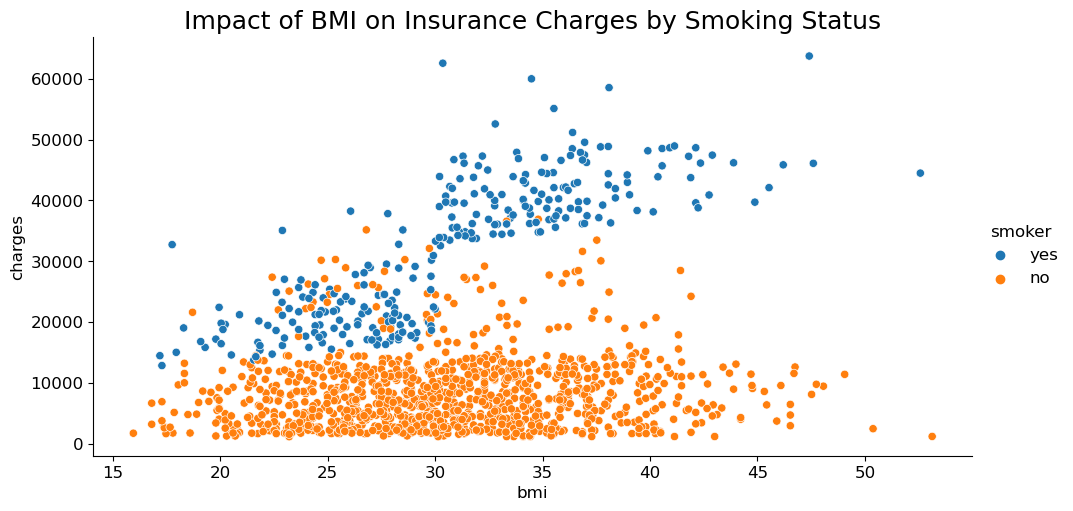

In [12]:
sns.relplot(x="bmi", y="charges", hue="smoker", data=df, kind="scatter", aspect=2)
plt.title('Impact of BMI on Insurance Charges by Smoking Status', size=18)
plt.show()

This scatter plot displays individual data points, with BMI on the x-axis and insurance charges on the y-axis. The data points are color-coded based on whether the individual is a smoker, allowing us to see clusters and patterns according to smoking status.

#### Analysis:
- Non-smokers are primarily clustered at the lower end of insurance charges, suggesting lower health risks associated with non-smoking status.
- Smokers, depicted by a different color, tend to have higher insurance charges, particularly as BMI increases, indicating higher health risks and thus higher insurance costs.
  
#### Interpretation with LaTeX Formulas:
We can tentatively infer a relationship between BMI and insurance charges, which could be mathematically modeled. A potential starting point could be a simple linear model:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{BMI} + \beta_2 \times \text{SmokerStatus} $

Here:
- $ \text{Charges} $ is the dependent variable.
- $ \beta_0 $ represents the intercept of the regression line.
- $ \beta_1 $ and $ \beta_2 $ are coefficients for BMI and smoker status, respectively.
- $ \text{BMI} $ is the independent variable.
- $ \text{SmokerStatus} $ is a binary variable indicating whether the individual is a smoker.

#### Conclusion:
This visualization helps us see how BMI and smoking status could potentially influence insurance charges. The clear separation between smokers and non-smokers regarding charges could be indicative of the additional risks and costs associated with smoking, compounded by an individual's BMI. The plot underlines the importance of considering lifestyle factors when evaluating insurance risks and costs.

---

## Influence of BMI and Number of Children on Insurance Charges

The relational plot examines how Body Mass Index (BMI) and the number of children affect insurance charges.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


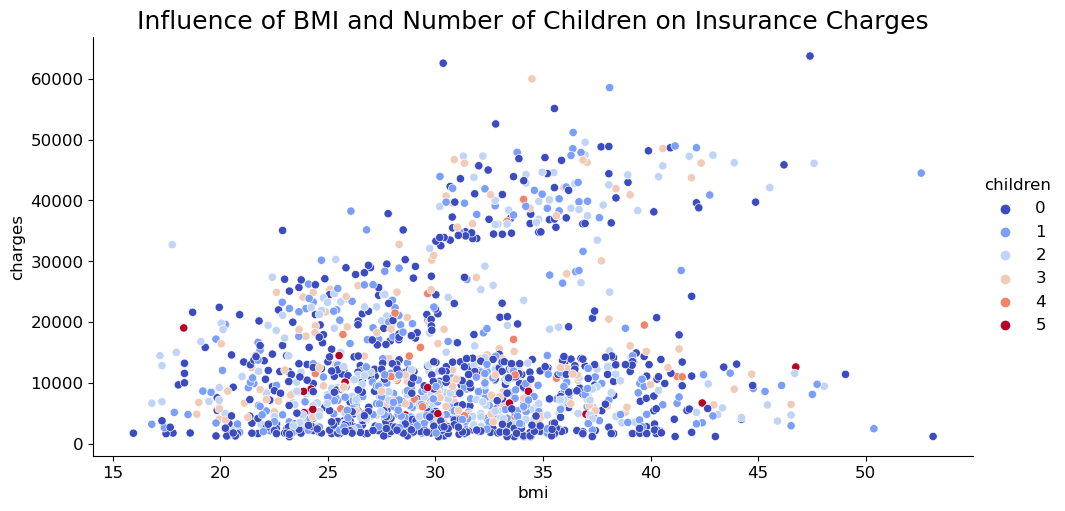

In [13]:
sns.relplot(x="bmi", y="charges", hue="children", data=df, kind="scatter", aspect=2, palette='coolwarm')
plt.title('Influence of BMI and Number of Children on Insurance Charges', size=18)
plt.show()

This scatter plot uses BMI as the x-axis and insurance charges on the y-axis. Data points are color-coded based on the number of children, displaying how family size might influence the cost of insurance.

#### Analysis:
- The distribution of points suggests that insurance charges generally increase with higher BMI.
- The different colors represent the number of children, showing how charges vary with different family sizes.

The legend in the scatter plot indicates the number of children each policyholder has, with each number representing a distinct category:

- **0**: Policyholders with no children.
- **1**: Policyholders with one child.
- **2**: Policyholders with two children.
- **3**: Policyholders with three children.
- **4**: Policyholders with four children.
- **5**: Policyholders with five children.

Each data point on the plot corresponds to a policyholder's charges based on their BMI, with the color of the point representing the number of children they have. This categorization is used to visually distinguish and identify patterns or trends related to family size within the dataset.

#### Interpretation with LaTeX Formulas:
The relationship here could be modeled with a more complex linear model that includes interaction terms:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{BMI} + \beta_2 \times \text{Children} + \beta_3 \times \text{BMI} \times \text{Children} $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the y-intercept of the model.
- $ \beta_1 $, $ \beta_2 $, and $ \beta_3 $ are the coefficients for BMI, the number of children, and their interaction term respectively.
- $ \text{BMI} \times \text{Children} $ represents the interaction term between BMI and the number of children.

#### Conclusion:
This plot provides insights into how charges could potentially increase with BMI and how this increase may be affected by the number of children a policyholder has. It highlights the nuanced relationship between individual health metrics, family size, and insurance costs, suggesting that insurance charges are a complex interplay of various factors.

---

## Health Charges by Age and Smoking Status

The linear regression plot explores the impact of age and smoking status on health insurance charges.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


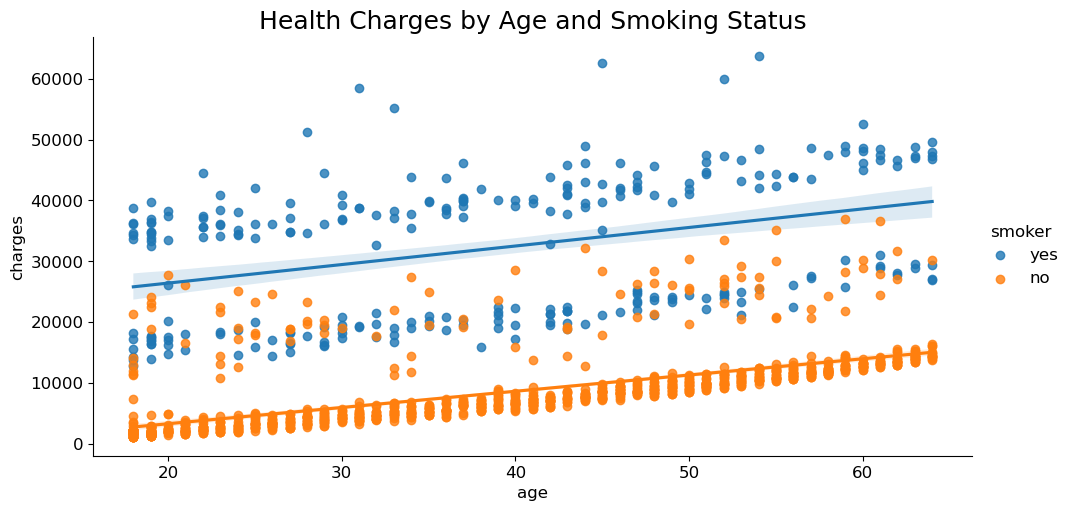

In [14]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, aspect=2)

# Add a title to the lmplot
plt.title('Health Charges by Age and Smoking Status', size=18)
plt.show()

The plot demonstrates a linear relationship between age and insurance charges, with a clear distinction based on smoking status. Smokers incur significantly higher charges than non-smokers, which is visualized by two distinct regression lines.

#### Analysis:
- The positive slope of the regression lines indicates that as age increases, the insurance charges tend to increase as well.
- There is a noticeable gap in charges between smokers and non-smokers, which could suggest that smoking is a high-risk factor that insurance companies consider when calculating charges.

#### Interpretation with LaTeX Formulas:
We can describe the observed trends with the following regression model:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Age} + \beta_2 \times \text{Smoker} $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the intercept of the regression line.
- $ \beta_1 $ is the coefficient for age, representing the effect of age on charges.
- $ \beta_2 $ is the coefficient for the smoker variable, capturing the additional charges associated with being a smoker.

#### Conclusion:
This visualization emphasizes the significant effect of smoking on health insurance charges and shows a clear trend of increasing charges with age. This insight can be pivotal for insurance companies to assess risk and for individuals to understand factors contributing to their insurance costs. The stark difference between smokers and non-smokers underscores the financial implications of smoking on health-related expenses.

---

## Impact of BMI on Health Charges Differentiated by Smoking Status

This linear regression plot delves into the relationship between Body Mass Index (BMI) and health insurance charges, with a comparison between smokers and non-smokers.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


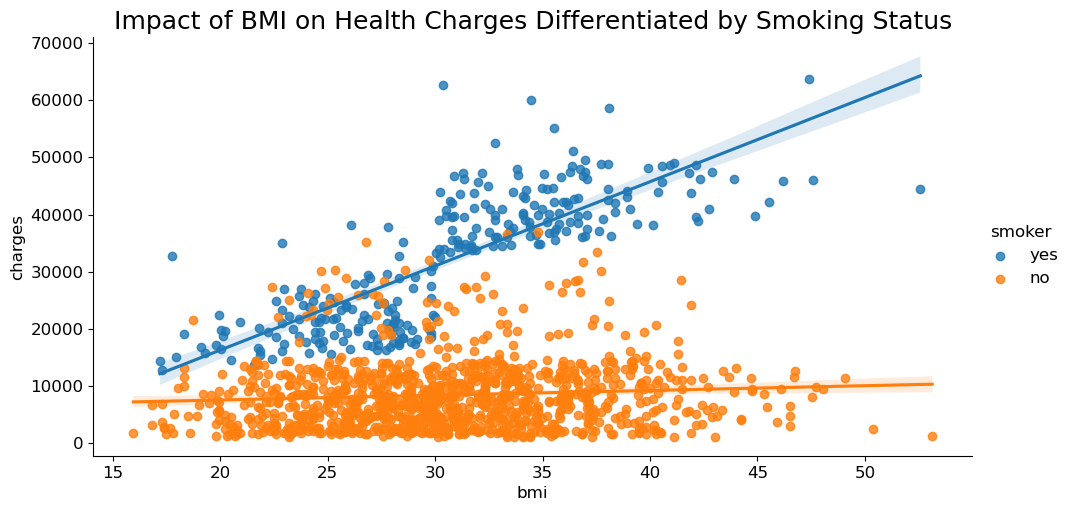

In [15]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, aspect=2)
plt.title('Impact of BMI on Health Charges Differentiated by Smoking Status', size=18)
plt.show()

The plot reveals two distinct trends based on smoking status. For smokers, there is a pronounced positive correlation between BMI and insurance charges, whereas for non-smokers, the relationship is more subdued.

#### Analysis:
- The steeper slope for smokers indicates that BMI has a more significant impact on insurance charges for this group.
- Non-smokers show a flatter slope, suggesting a less pronounced but still present effect of BMI on charges.

#### Interpretation with LaTeX Formulas:
The linear model for each group can be expressed as follows:

For non-smokers:
$ \text{Charges}_{\text{non-smoker}} = \beta_0 + \beta_1 \times \text{BMI} $

For smokers:
$ \text{Charges}_{\text{smoker}} = \beta_0 + \beta_1 \times \text{BMI} + \beta_2 $

Where:
- $ \text{Charges} $ is the dependent variable, representing the insurance charges.
- $ \beta_0 $ is the y-intercept common to both smokers and non-smokers.
- $ \beta_1 $ is the slope coefficient for BMI.
- $ \beta_2 $ represents the additional charges for smokers at any BMI level.

#### Conclusion:
BMI plays a role in determining health insurance charges, and this effect is amplified by smoking status. The data suggests that smoking not only contributes to higher overall charges but also exacerbates the cost impact of higher BMI. This insight can inform personal health decisions and guide insurance policy formulations.

---

## Age Distribution of Insurance Beneficiaries

This histogram provides a visual representation of the age distribution of individuals who have health insurance.

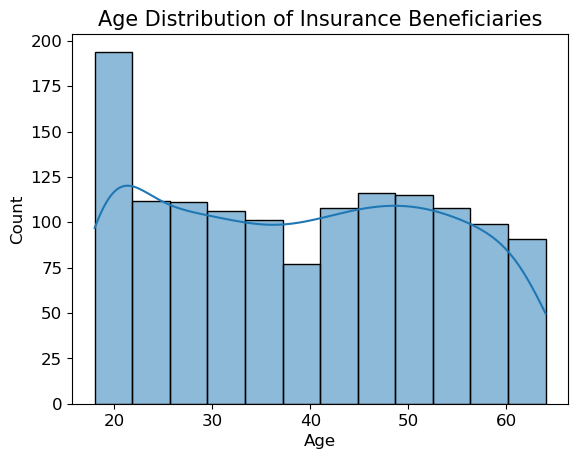

In [16]:
sns.histplot(df.age, kde=True)
plt.title('Age Distribution of Insurance Beneficiaries', size=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The histogram showcases the frequency of different ages within the dataset, with a kernel density estimate (KDE) overlay providing a smooth curve representing the distribution.

#### Analysis:
- A large number of beneficiaries are in their early 20s, as indicated by the first tall bar.
- The distribution appears to be fairly uniform for other age groups, barring the initial spike.

#### Interpretation with LaTeX Formulas:
The KDE can be thought of as a sum of Gaussian distributions, one for each data point:

$ KDE(x) = \sum_{i=1}^{N} \frac{1}{Nh} \phi \left( \frac{x-x_i}{h} \right) $

Where:
- $ N $ is the number of data points.
- $ h $ is the bandwidth, determining the width of the Gaussian kernels.
- $ \phi $ is the Gaussian kernel function.
- $ x_i $ is each data point.

#### Conclusion:
The age distribution is an important factor for insurers as it reflects the risk pool of their beneficiaries. The spike in early 20s may reflect a trend of young adults acquiring their own insurance after aging out of parental plans. Understanding this distribution helps in designing age-specific insurance packages and predicting the insurance market trends.

---

## Normality Assessment of Insurance Charges

The Q-Q (quantile-quantile) plot is a graphical tool to assess if a dataset follows a particular distribution, in this case, a normal distribution.

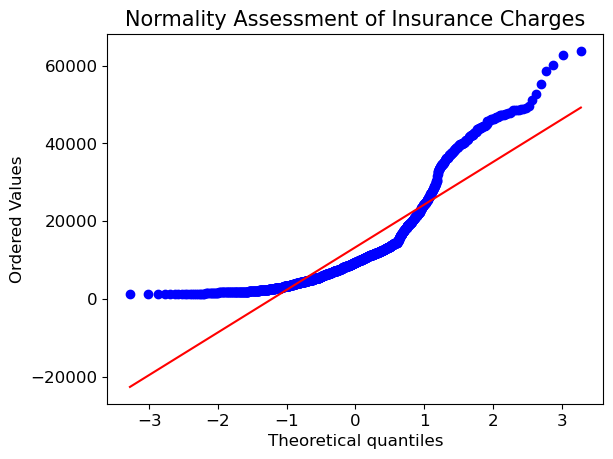

In [17]:
stats.probplot(df.charges, dist="norm", plot=pylab)
plt.title('Normality Assessment of Insurance Charges', size=15)
plt.show()

The plot displays the actual quantiles of insurance charges against the theoretical quantiles of a normal distribution. Data following a normal distribution should closely align with the red reference line.

#### Analysis:
- There is a noticeable deviation from the red line, especially at the tails, indicating that the charges distribution is not normal.
- The plot suggests that the distribution is right-skewed, which is common for financial data.

#### Interpretation with LaTeX Formulas:
The Q-Q plot can be used to visually assess the normality of data. If the data were normally distributed, we would expect points to follow the line $ y = x $, where $ y $ represents the ordered values and $ x $ represents the theoretical quantiles.

#### Conclusion:
The charges distribution's deviation from normality suggests that linear regression assumptions may not hold, which could affect the validity of regression analyses. Transformations or non-parametric methods might be more appropriate for modeling such data.

---

## Average Insurance Charges Based on Smoking Status

The bar chart provides a visual comparison of the average insurance charges for smokers versus non-smokers.

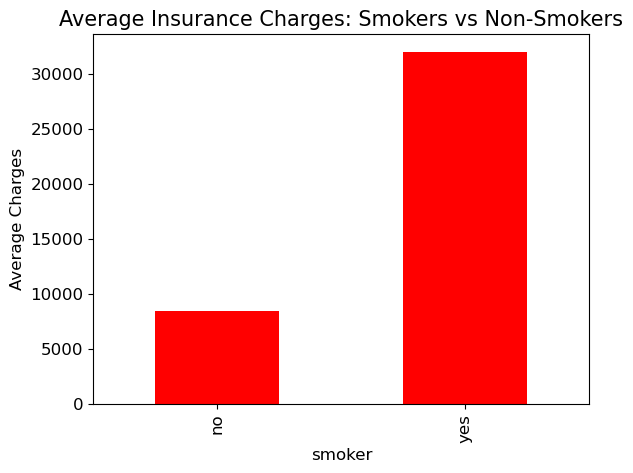

In [18]:
df.groupby("smoker")["charges"].mean().plot.bar(color="r")
plt.title('Average Insurance Charges: Smokers vs Non-Smokers', size=15)
plt.ylabel('Average Charges')
plt.show()

This bar chart shows two bars representing the mean insurance charges for non-smokers and smokers, with smokers incurring significantly higher costs.

#### Analysis:
- The average charge for smokers is markedly higher than for non-smokers, indicating that smoking status is a significant predictor of insurance charges.

#### Interpretation with LaTeX Formulas:
The difference in charges can be statistically analyzed using a t-test to determine if the means of two independent samples are significantly different.

The null hypothesis $ H_0 $ for the t-test can be:
$ H_0: \mu_{\text{non-smokers}} = \mu_{\text{smokers}} $

Where $ \mu $ represents the population mean of insurance charges.

#### Conclusion:
The bar chart clearly demonstrates the financial impact of smoking on insurance charges, providing evidence for insurers to adjust premiums based on smoking status due to the increased risk and associated healthcare costs.

---

## Average Insurance Charges by Number of Children

The bar chart illustrates how the number of children affects the average insurance charges for policyholders.

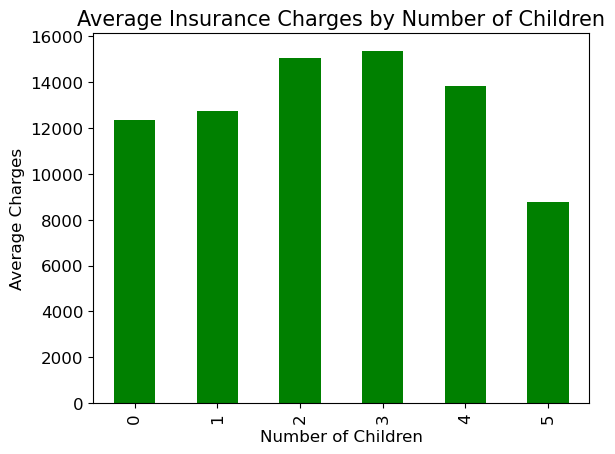

In [19]:
df.groupby("children")["charges"].mean().plot.bar(color="g")
plt.title('Average Insurance Charges by Number of Children', size=15)
plt.ylabel('Average Charges')
plt.xlabel('Number of Children')
plt.show()

A series of bars represent the average insurance charges corresponding to the number of children the policyholders have, ranging from 0 to 5.

#### Analysis:
- There appears to be a slight increase in the average charges as the number of children increases up to three, after which it decreases.
- Policyholders with three children tend to have higher insurance charges on average, while those with five children have the lowest among the groups.

#### Interpretation with LaTeX Formulas:
We could hypothesize that the number of children is associated with insurance charges and explore a linear relationship:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Children} $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the y-intercept of the model.
- $ \beta_1 $ is the coefficient for the number of children.

#### Conclusion:
The graph suggests that while the number of children may impact insurance charges, the relationship is not strictly linear. Other factors may also influence the costs, such as the age of the children, the health of the family, or policy details. This visualization prompts further investigation into how family size influences insurance premiums.

---

## Distribution of Insurance Charges by Gender

The Kernel Density Estimate (KDE) plot visualizes the distribution of insurance charges based on gender.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


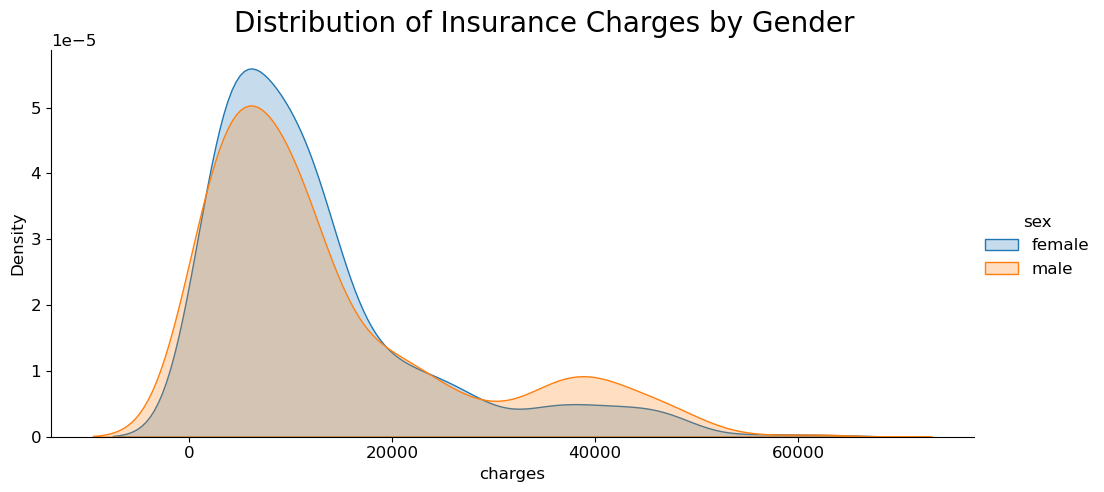

In [20]:
g = sns.FacetGrid(df, hue="sex", height=5, aspect=2)
g = g.map(sns.kdeplot, "charges", fill=True).add_legend()
g.fig.suptitle('Distribution of Insurance Charges by Gender', size=20)
plt.subplots_adjust(top=0.9) # Adjust title position
plt.show()

The KDE plot showcases two curves representing the probability density of insurance charges for female and male policyholders.

#### Analysis:
- Both distributions have a right-skewed shape, indicating that a majority of policyholders have lower charges, with fewer individuals incurring very high charges.
- The distributions for females and males are quite similar, suggesting that gender may not be a significant factor in determining insurance charges.

#### Interpretation with LaTeX Formulas:
To examine the impact of gender on insurance charges, we might consider a logistic regression model if charges were categorical (e.g., high vs. low):

$ \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 \times \text{Gender} $

Where:
- $ p $ is the probability of having high insurance charges.
- $ \beta_0 $ and $ \beta_1 $ are the model coefficients.
- $ \text{Gender} $ is the predictor variable.

#### Conclusion:
This visualization suggests that gender does not significantly differentiate insurance charges. Statistical tests or more complex modeling could provide further insights into whether there is any subtle impact of gender on insurance charges that is not immediately evident from this visualization.

---

## Insurance Charges Distribution Across Regions

The plot illustrates the distribution of insurance charges across different regions.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


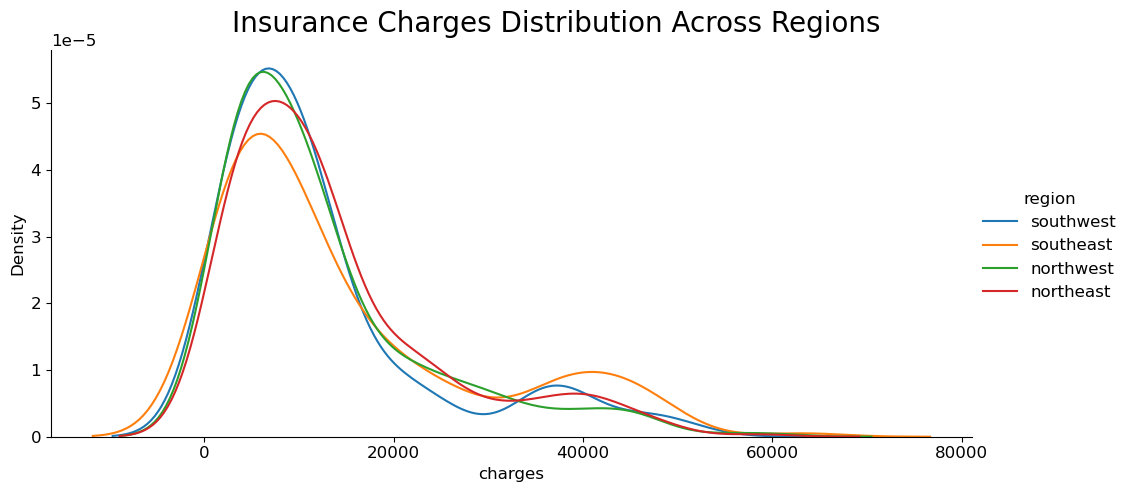

In [21]:
g = sns.FacetGrid(df, hue="region", height=5, aspect=2)
g = g.map(sns.kdeplot, "charges", fill=False).add_legend()
g.fig.suptitle('Insurance Charges Distribution Across Regions', size=20)
plt.subplots_adjust(top=0.9)
plt.show()

The KDE plot shows four overlapping curves, each representing one of the four regions: southwest, southeast, northwest, and northeast.

#### Analysis:
- The curves indicate that the distribution of charges is quite similar across regions, with all exhibiting a right-skewed distribution.
- There are some differences in the tails of the distributions, which could suggest regional variations in the higher insurance charge rates.

#### Interpretation with LaTeX Formulas:
A potential model to assess the impact of region on charges could be a multivariate regression:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Southwest} + \beta_2 \times \text{Southeast} + \beta_3 \times \text{Northwest} + \beta_4 \times \text{Northeast} $

Where:
- $ \text{Charges} $ is the dependent variable.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, \beta_3, \text{ and } \beta_4 $ are the coefficients representing the effect of each region.

#### Conclusion:
This visual analysis suggests that while there are some regional differences in insurance charges, the overall pattern of distribution is consistent across the regions. Further statistical analysis could clarify the extent and significance of these regional differences.

---

## Impact of Smoking on Insurance Charges by Gender

This bar chart compares the average insurance charges between smokers and non-smokers, differentiated by gender.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


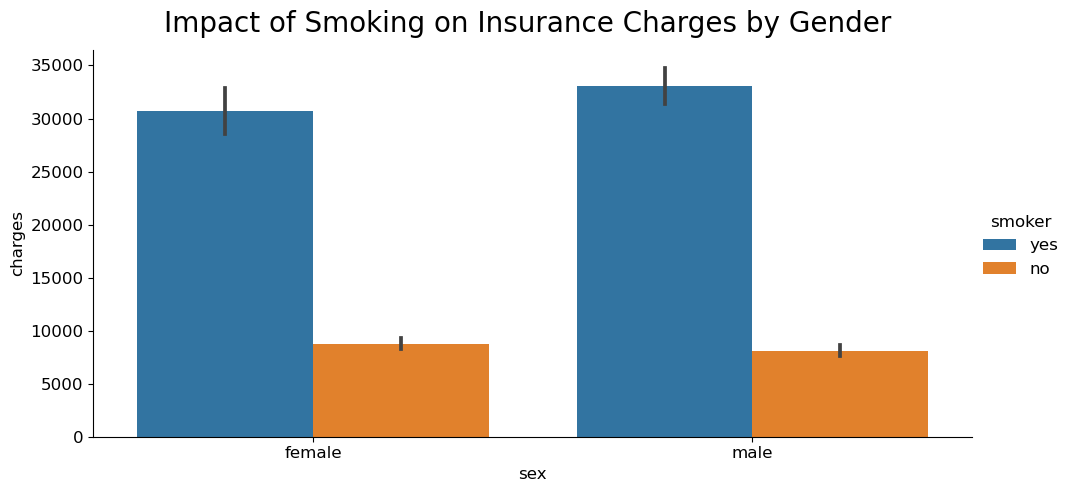

In [22]:
g = sns.catplot(x="sex", y="charges", hue="smoker", data=df, kind="bar", aspect=2)
g.fig.suptitle('Impact of Smoking on Insurance Charges by Gender', size=20)
plt.subplots_adjust(top=0.9)
plt.show()

The plot has two main bars for each gender, split into smokers and non-smokers.

#### Analysis:
- It is immediately apparent that smokers have substantially higher charges than non-smokers, regardless of gender.
- Male smokers tend to have slightly higher charges than female smokers.

#### Interpretation with LaTeX Formulas:
The difference in charges based on smoking status can be statistically examined using an interaction term in a regression model:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Gender} + \beta_2 \times \text{Smoker} + \beta_3 \times \text{Gender} \times \text{Smoker} $

Where:
- $ \text{Charges} $ is the dependent variable.
- $ \beta_0 $ is the baseline charge for non-smokers.
- $ \beta_1 $ and $ \beta_2 $ represent the additional charge for being male and being a smoker, respectively.
- $ \beta_3 $ shows the additional effect on charges for male smokers compared to female smokers.

#### Conclusion:
The visual suggests that smoking is a significant factor affecting insurance charges and that this impact is slightly more pronounced for males than for females. The interaction term in the regression model can quantify these effects.

---

## Regional Differences in Insurance Charges by Gender

This bar chart explores the average insurance charges by gender across different regions.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


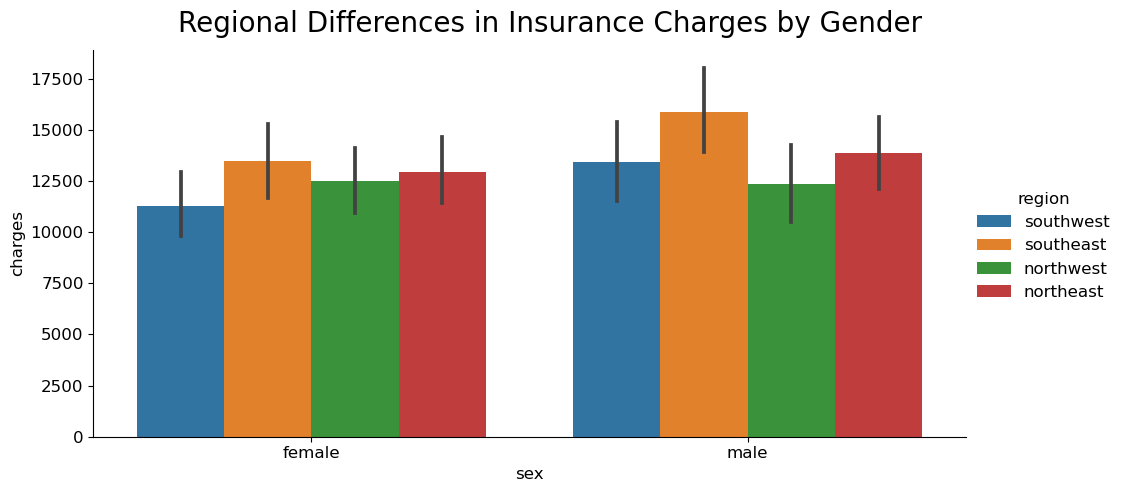

In [23]:
g = sns.catplot(x="sex", y="charges", hue="region", data=df, kind="bar", aspect=2)
g.fig.suptitle('Regional Differences in Insurance Charges by Gender', size=20)
plt.subplots_adjust(top=0.9)
plt.show()

The chart displays four sets of bars for each gender, each representing a different region.

#### Analysis:
- The charges do not differ significantly by region for the same gender.
- Both male and female policyholders have comparable charges across regions, with some variation.

#### Interpretation with LaTeX Formulas:
We could model the influence of region and gender on charges using a multiple linear regression:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Gender} + \sum (\beta_{\text{region}_i} \times \text{Region}_i) $

Where:
- $ \text{Charges} $ is the dependent variable.
- $ \beta_0 $ represents the baseline charge.
- $ \beta_1 $ is the coefficient for gender.
- $ \beta_{\text{region}_i} $ are coefficients for each region $ \text{Region}_i $.

#### Conclusion:
There seems to be a small variation in charges by region, but gender does not significantly differentiate the charges within the same region. This suggests that while region may play a role in determining insurance costs, it does not interact strongly with the policyholder's gender.

---

## Impact of Smoking on Insurance Charges

This boxplot illustrates the distribution of insurance charges among smokers and non-smokers.

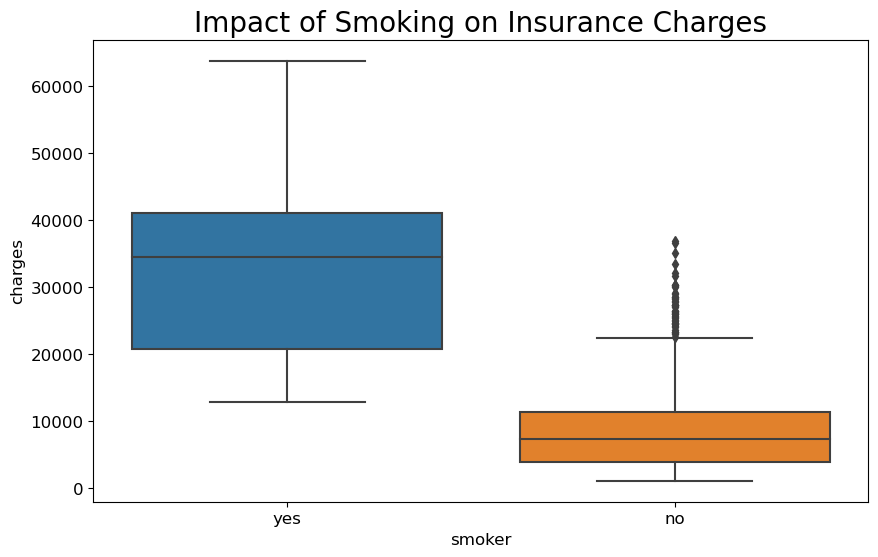

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title('Impact of Smoking on Insurance Charges', size=20)
plt.show()

Two boxplots represent the distribution of insurance charges for smokers and non-smokers.

#### Analysis:
- Smokers have a higher median charge and a wider interquartile range, indicating greater variation and overall higher charges.
- Non-smokers have a lower median charge, and the interquartile range is narrower, showing less variation and lower overall charges.

The points on the boxplot above the orange box, which represents non-smokers, are known as "outliers." In statistical terms, an outlier is a data point that differs significantly from other observations. They could indicate variability in the data, experimental errors, or a heavy-tailed distribution.

#### Interpretation with LaTeX Formulas:
The difference in charges based on smoking status could be expressed using a simple linear regression model:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Smoker} $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the baseline charge for non-smokers.
- $ \beta_1 $ is the coefficient that represents the additional charge for smokers.

#### Conclusion:
The plot clearly demonstrates that smoking status is associated with higher insurance charges. The data suggests that being a smoker is likely to increase the costs of insurance premiums significantly.

---

## Gender Disparity in Insurance Charges

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


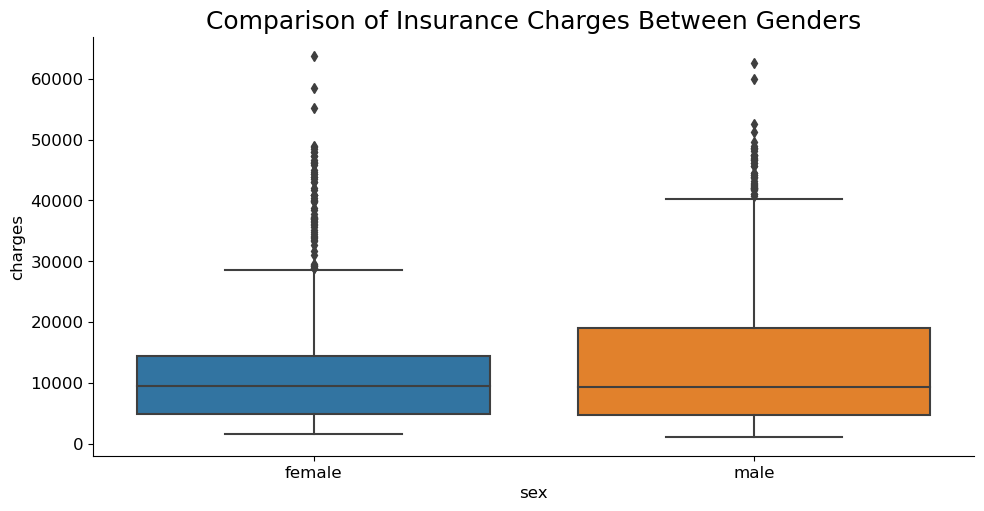

In [25]:
sns.catplot(x="sex", y="charges", data=df, kind="box", aspect=2)
plt.title('Comparison of Insurance Charges Between Genders', size=18)
plt.show()

The boxplot visually summarizes the distribution of insurance charges between females and males.

#### Analysis:
- Both boxplots show a wide range of insurance charges for both genders, with the median charge for males slightly higher than for females.
- The presence of outliers (represented by the diamonds above the boxes) suggests that there are individuals in both genders with charges that are significantly higher than the general population.

#### Interpretation with LaTeX Formulas:
A statistical model for analyzing such data could be a two-sample t-test, which is used to determine if there is a significant difference between the means of two groups. The hypothesis testing can be represented as:

$ H_0: \mu_{female} = \mu_{male} $
$ H_1: \mu_{female} \neq \mu_{male} $

Where:
- $ H_0 $ is the null hypothesis that the mean charges for females and males are equal.
- $ H_1 $ is the alternative hypothesis that the mean charges for females and males are different.
- $ \mu_{female} $ and $ \mu_{male} $ are the mean charges for females and males, respectively.

#### Conclusion:
This plot highlights potential differences in insurance charges based on gender. Further statistical analysis could confirm whether these differences are statistically significant or not.

---

## Impact of Smoking on Insurance Charges by Gender

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


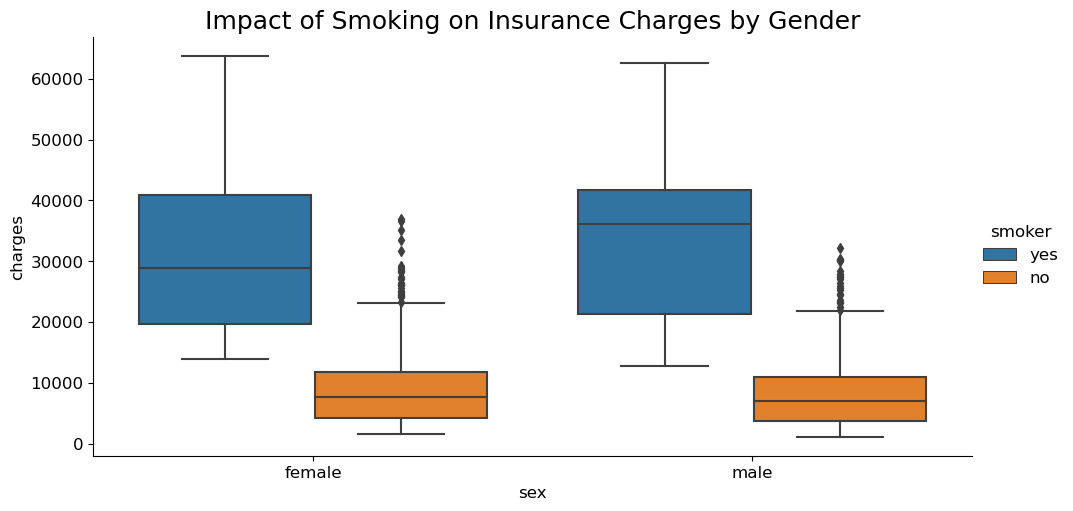

In [26]:
sns.catplot(x="sex", y="charges", hue="smoker", data=df, kind="box", aspect=2)
plt.title('Impact of Smoking on Insurance Charges by Gender', size=18)
plt.show()

The graph presents two boxplots for each gender, differentiated by smoking status.

#### Analysis:
- The boxplots compare the distribution of insurance charges among females and males, further divided into smokers and non-smokers.
- The median insurance charge for smokers is significantly higher than for non-smokers in both genders, indicating a strong impact of smoking on insurance costs.

#### Interpretation with LaTeX Formulas:
A potential statistical approach to analyze these differences is through Analysis of Variance (ANOVA), especially two-way ANOVA, since we have two factors: gender and smoking status. The model can be represented as:

$ \text{Charges} = \mu + \alpha_{\text{Gender}} + \beta_{\text{Smoker}} + (\alpha\beta)_{\text{Interaction}} + \epsilon $

Where:
- $ \text{Charges} $ is the dependent variable.
- $ \mu $ is the overall mean charges.
- $ \alpha_{\text{Gender}} $ represents the effect of gender on charges.
- $ \beta_{\text{Smoker}} $ represents the effect of smoking status on charges.
- $ (\alpha\beta)_{\text{Interaction}} $ is the interaction effect between gender and smoking status.
- $ \epsilon $ is the error term.

#### Conclusion:
The considerable difference in insurance charges between smokers and non-smokers across genders could be indicative of the higher risks and potential health costs associated with smoking. The interaction effect would reveal if the impact of smoking on insurance charges differs between genders.

---

## Comparison of Insurance Charges Across Different Regions

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


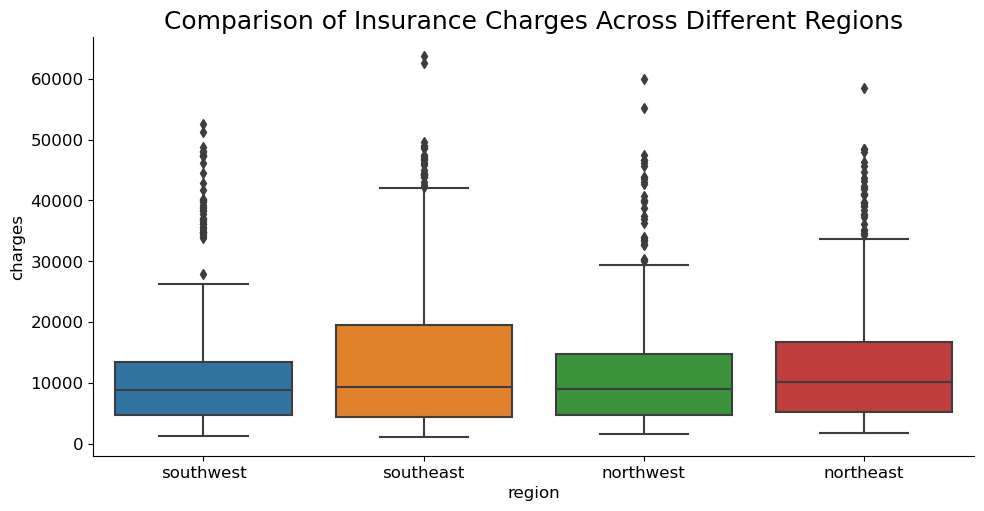

In [27]:
sns.catplot(x="region", y="charges", data=df, kind="box", aspect=2)
plt.title('Comparison of Insurance Charges Across Different Regions', size=18)
plt.show()

The graph displays four boxplots corresponding to the four regions: southwest, southeast, northwest, and northeast.

#### Analysis:
- Each boxplot summarizes the distribution of insurance charges within a region, providing insights into regional differences.
- The plot indicates variations in median charges across regions, with some outliers, particularly in the southeast and northeast regions.

#### Interpretation with LaTeX Formulas:
The distribution of insurance charges across regions could be analyzed using a one-way ANOVA to test if there are significant differences among the means of the different groups. The model is given by:

$ \text{Charges}_{ijk} = \mu + \tau_i + \epsilon_{ijk} $

Where:
- $ \text{Charges}_{ijk} $ is the dependent variable for the $ k^{th} $ observation in the $ i^{th} $ region.
- $ \mu $ is the grand mean of charges.
- $ \tau_i $ is the effect of the $ i^{th} $ region.
- $ \epsilon_{ijk} $ is the random error term.

#### Conclusion:
This boxplot analysis provides a visual representation of how insurance charges can vary by region, which may reflect regional differences in healthcare costs, lifestyle, and other socio-economic factors. Further statistical testing can confirm if these differences are statistically significant.

---

## Insurance Charges by Number of Children

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


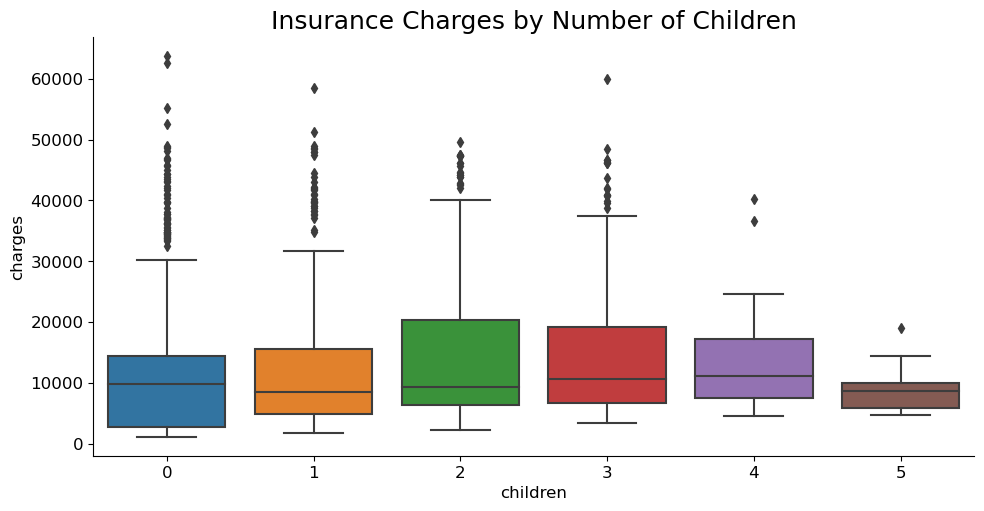

In [28]:
sns.catplot(x="children", y="charges", data=df, kind="box", aspect=2)
plt.title('Insurance Charges by Number of Children', size=18)
plt.show()

The boxplot visualizes the distribution of insurance charges segmented by the number of children covered by the insurance policy.

#### Analysis:
- The median insurance charge generally does not show a clear trend as the number of children increases.
- There is a notable presence of outliers, especially for families with fewer children, suggesting some individuals or families face significantly higher charges.

#### Interpretation with LaTeX Formulas:
The variance of insurance charges with respect to the number of children can be analyzed by a linear regression model that might include a term for the number of children, given by:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{Children} + \epsilon $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the intercept term of the model.
- $ \beta_1 $ is the coefficient for the number of children.
- $ \epsilon $ represents the error term.

#### Conclusion:
The plot underscores the variability in insurance charges that can be associated with the number of children a policyholder has. While there isn't a clear increasing or decreasing pattern, the presence of outliers suggests that specific cases can deviate significantly from the median, which warrants a more detailed analysis.

---

## Impact of BMI Categories on Insurance Charges

In [29]:
labels=["too_weak","normal","heavy","too_heavy"]
ranges=[0,18.5,24.9,29.9,np.inf]
df["bmi"]=pd.cut(df["bmi"],bins=ranges,labels=labels)

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


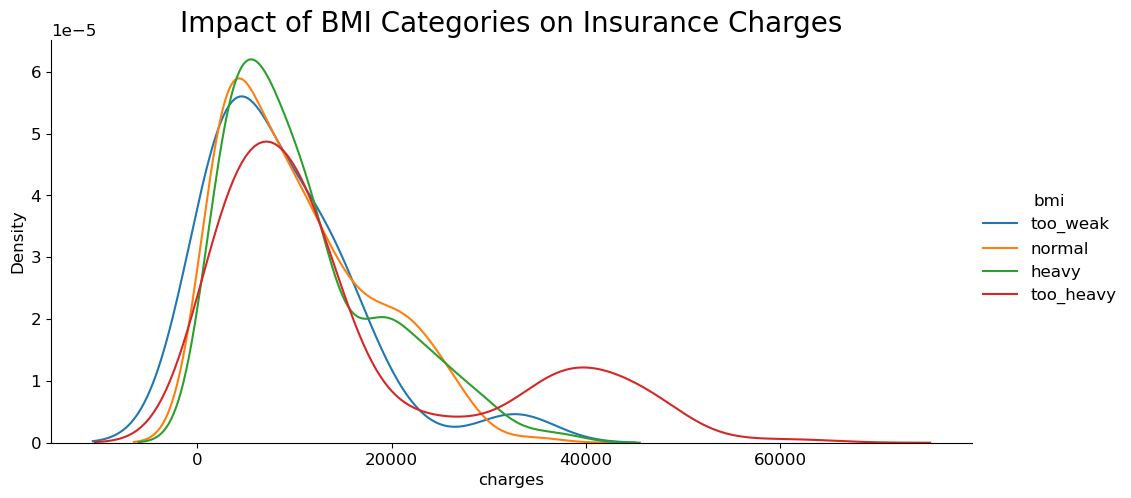

In [30]:
g = sns.FacetGrid(df, hue="bmi", height=5, aspect=2)
g = g.map(sns.kdeplot, "charges", fill=False)
g = g.add_legend()
plt.title('Impact of BMI Categories on Insurance Charges', size=20)
plt.show()

This density plot presents the distribution of insurance charges across different BMI categories.

#### Analysis:
- Each curve represents a BMI category, with the x-axis showing insurance charges and the y-axis representing the density.
- The plot indicates that the insurance charges distribution varies with BMI, with different peaks for each category.

#### Interpretation with LaTeX Formulas:
The distribution of charges by BMI category could suggest different average charges per category, which can be represented as:

$ \mu_{\text{category}} = \frac{1}{n_{\text{category}}} \sum_{i=1}^{n_{\text{category}}} \text{Charges}_i $

Where:
- $ \mu_{\text{category}} $ is the mean insurance charge for a particular BMI category.
- $ n_{\text{category}} $ is the number of individuals in each BMI category.
- $ \text{Charges}_i $ is the insurance charge for the $ i^{th} $ individual.

#### Conclusion:
The BMI appears to influence insurance charges, as seen in the different distributions for each category. Those in the 'too heavy' category tend to have higher insurance charges, which may reflect higher health risks associated with this BMI range. This analysis could be useful for insurers to stratify risk and for individuals to understand how their BMI may impact their insurance costs.

---

## Average Insurance Charges by BMI Category

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


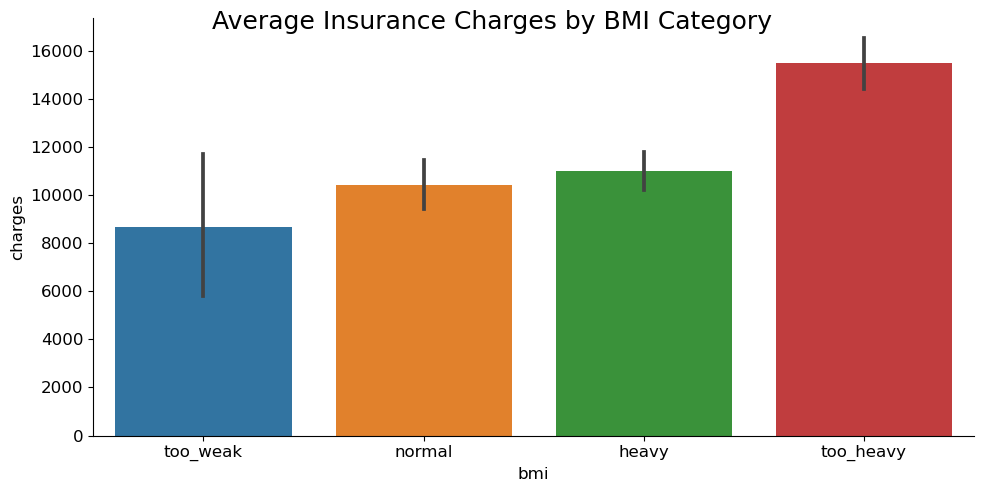

In [31]:
g = sns.catplot(x="bmi", y="charges", kind="bar", data=df, aspect=2)
g.fig.suptitle('Average Insurance Charges by BMI Category', size=18)
plt.show()

The bar chart illustrates the average insurance charges for each BMI category: 'too weak', 'normal', 'heavy', and 'too heavy'.

#### Analysis:
- The bars represent the average charge for each category, with the error bars indicating variability within each category.
- A clear upward trend is visible, indicating that charges generally increase with higher BMI categories.

#### Interpretation with LaTeX Formulas:
The mean charges per BMI category can be mathematically described by the mean formula:

$ \mu_{\text{category}} = \frac{1}{n_{\text{category}}} \sum_{i=1}^{n_{\text{category}}} \text{Charges}_i $

Where:
- $ \mu_{\text{category}} $ is the mean insurance charge for the BMI category.
- $ n_{\text{category}} $ is the total number of observations in the BMI category.
- $ \text{Charges}_i $ represents the individual insurance charges in the category.

#### Conclusion:
This visualization aids in understanding how BMI influences the cost of insurance. Individuals in the 'too heavy' category incur the highest average charges, possibly reflecting the increased health risks and medical costs associated with higher BMI. This data could be instrumental for insurance companies when assessing risk profiles and for individuals mindful of how their BMI may affect their insurance premiums.

---

## Insurance Charges by BMI Category and Number of Children

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


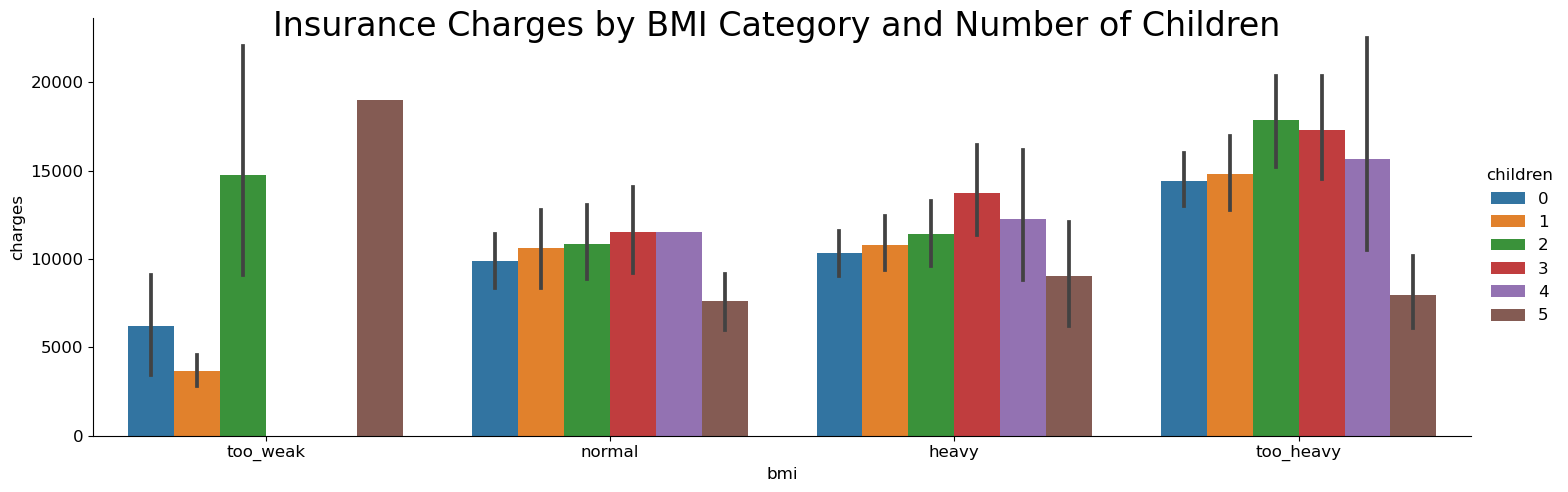

In [32]:
g = sns.catplot(x="bmi", y="charges", hue="children", kind="bar", data=df, aspect=3)
g.fig.suptitle('Insurance Charges by BMI Category and Number of Children', size=24)
plt.show()

The bar chart displays insurance charges across different BMI categories, further broken down by the number of children the insured has.

#### Analysis:
- Each set of bars corresponds to a BMI category, with individual bars showing the average insurance charges for insured with different numbers of children.
- The error bars represent the variability within each subgroup, indicating the confidence interval around the mean estimate.

#### Interpretation with LaTeX Formulas:
We can describe the influence of both BMI and the number of children on insurance charges with a multiple linear regression model:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{BMI}_\text{category} + \beta_2 \times \text{Children} + \epsilon $

Where:
- $ \text{Charges} $ is the dependent variable representing insurance charges.
- $ \beta_0 $ is the intercept of the model.
- $ \beta_1 $ and $ \beta_2 $ are the coefficients for the categorical BMI and the number of children respectively.
- $ \epsilon $ represents the error term, accounting for the variability not explained by the model.

#### Conclusion:
The chart suggests that insurance charges are affected by both BMI and the number of children, with higher charges generally associated with higher BMI and more children. This visualization helps to understand the combined effect of these two factors on insurance charges and can be useful for actuaries and health policy planners.

---

## Impact of BMI on Insurance Charges for Smokers and Non-Smokers

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


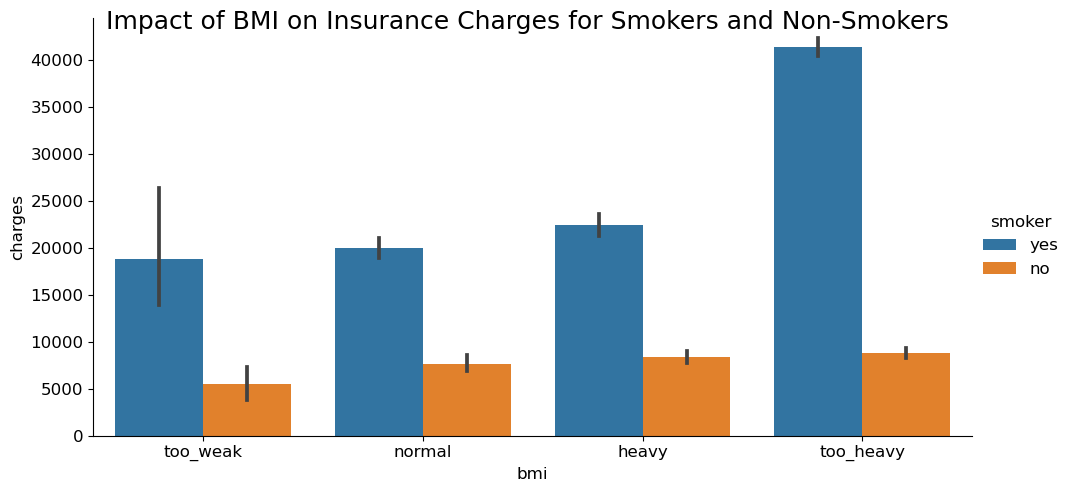

In [33]:
g = sns.catplot(x="bmi", y="charges", hue="smoker", kind="bar", data=df, aspect=2)
g.fig.suptitle('Impact of BMI on Insurance Charges for Smokers and Non-Smokers', size=18)
plt.show()

The bar chart visualizes insurance charges based on BMI categories, comparing smokers to non-smokers.

#### Analysis:
- Bars are grouped by BMI categories: too weak, normal, heavy, and too heavy.
- Within each BMI category, there are two bars representing the average insurance charges for smokers and non-smokers, respectively.
- The vertical lines on the bars indicate the confidence intervals, reflecting the uncertainty regarding the mean estimate.

#### Interpretation with LaTeX Formulas:
To estimate the impact of BMI and smoking status on insurance charges, a multiple regression model can be employed:

$ \text{Charges} = \beta_0 + \beta_1 \times \text{BMI}_\text{category} + \beta_2 \times \text{SmokerStatus} + \epsilon $

Where:
- $ \text{Charges} $ is the dependent variable indicating insurance charges.
- $ \beta_0 $ is the model's intercept.
- $ \beta_1 $ is the coefficient for the categorical BMI.
- $ \beta_2 $ is the coefficient for the smoker status (1 if smoker, 0 if non-smoker).
- $ \epsilon $ is the error term capturing the variation not explained by the model.

#### Conclusion:
The visualization indicates a significant difference in insurance charges between smokers and non-smokers across all BMI categories, with smokers incurring higher charges. This pattern persists regardless of the BMI category, underscoring the substantial financial impact of smoking on health insurance costs. This insight is critical for public health awareness and insurance pricing strategies.

---

## Analysis and Purpose for Visualizations:

Above we visualized an insurance dataset. The primary goal of this analytical process was to uncover patterns and relationships within the data that can inform decision-making for stakeholders, such as insurance companies, healthcare providers, and policy-makers.

### Key Insights:

1. **Distribution of Charges:** The initial histograms and KDE plots provided a clear visualization of the distribution of insurance charges, revealing a right-skewed distribution that normalizes upon log-transformation, suggesting the presence of outliers influencing the charges.

2. **Impact of Smoking:** Bar and box plots distinctly showed that smoking status has a significant impact on insurance charges, with smokers incurring substantially higher costs than non-smokers.

3. **Age and Charges:** The scatter plots and regression lines indicated that age is a factor in insurance charges, with a general trend of increasing charges with age, particularly among smokers.

4. **BMI Analysis:** Stratifying by BMI categories, we observed that higher BMI generally correlates with increased insurance charges, which is particularly pronounced for individuals who smoke.

5. **Children and Charges:** Analysis by the number of children showed that insurance costs are also influenced by the size of the insured's family, though the relationship is not as straightforward as with other factors.

6. **Regional Differences:** The distribution and bar plots highlighted some regional differences in insurance charges, suggesting that location-based factors also play a role in determining insurance costs.

7. **Gender Factor:** The comparison between genders showed some differences in insurance charges. However, these differences are not as pronounced as those observed for smoking status or BMI.

8. **Interplay of Factors:** The pair plots and categorical plots underscore the complex interplay of multiple factors—age, BMI, children, smoking status, and region—influencing insurance charges.

### Purpose of Analysis:

The purpose behind this analysis was multifold:

- **Risk Assessment:** To help insurers better understand the risk profile of their customers and set premiums accordingly.
- **Policy Development:** To inform healthcare policy-makers on key factors influencing healthcare costs, which can guide policy development.
- **Customer Insight:** To provide customers with insights into what factors are affecting their insurance charges and potentially guide them toward cost-lowering behaviors.
- **Healthcare Economics:** To contribute to the broader understanding of healthcare economics and the distribution of healthcare costs across different demographics.

### Final Thoughts:

This data-driven approach has shed light on how individual and regional characteristics impact insurance charges. It has laid a foundation for more nuanced risk modeling and personalized insurance offerings. The visuals serve as a compelling narrative to non-technical stakeholders, illustrating the importance of data in strategic decision-making within the insurance and healthcare industries.

---

Let's analyze the provided correlation matrix and understand the relationships between 'age', 'children', and 'charges'.

## Analysis of Correlation Matrix

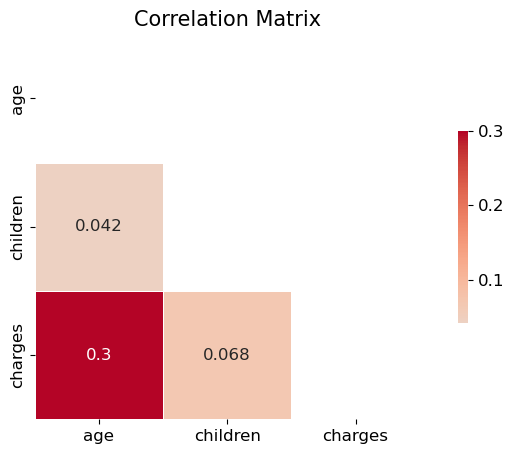

In [34]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix', size=15)

plt.show()



#### Code Description:
The code snippet provided generates a correlation matrix heatmap for numerical columns within a DataFrame. The heatmap visualizes the correlation coefficients between pairs of variables, where:
- A positive value indicates a positive correlation: as one variable increases, so does the other.
- A negative value indicates a negative correlation: as one variable increases, the other decreases.
- Values closer to 1 or -1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.

The `mask` is used to hide the upper triangle of the heatmap, as the matrix is symmetrical and the upper triangle would show the same information as the lower triangle.

#### Output Analysis:
- `age` and `charges` have a correlation of 0.3, suggesting a moderate positive relationship. This implies that as age increases, charges tend to increase as well, which makes sense because older individuals generally have more health issues and therefore incur higher insurance charges.
- `children` and `charges` have a very weak positive correlation of 0.068, indicating that the number of children has a negligible effect on insurance charges.
- `age` and `children` have an even weaker positive correlation of 0.042, suggesting almost no linear relationship between the age of the insured and the number of children they have.

#### Interpretation with LaTeX Formulas:
Using LaTeX, we can represent the correlation coefficient ($ r $) between two variables $ x $ and $ y $ as:

$ r_{xy} = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}} $

The heatmap provides a quick visual understanding of how 'age' and 'children' relate to 'charges'. The strongest correlation is between 'age' and 'charges', which could be a factor insurance companies use to determine premiums. The weak correlation between 'children' and 'charges' suggests that the number of children is not a strong predictor of insurance costs in this particular dataset. 

To improve the model's predictive power, it would be beneficial to explore other variables that might have a stronger relationship with 'charges', such as 'smoker' status, 'bmi', or 'region'.

---

Here we create a side-by-side comparison of boxplots for the distribution of insurance charges and the age of beneficiaries using Seaborn's `boxplot` function.

### Code Description:
Here's an enhanced version of the provided code, including titles for the boxplots:

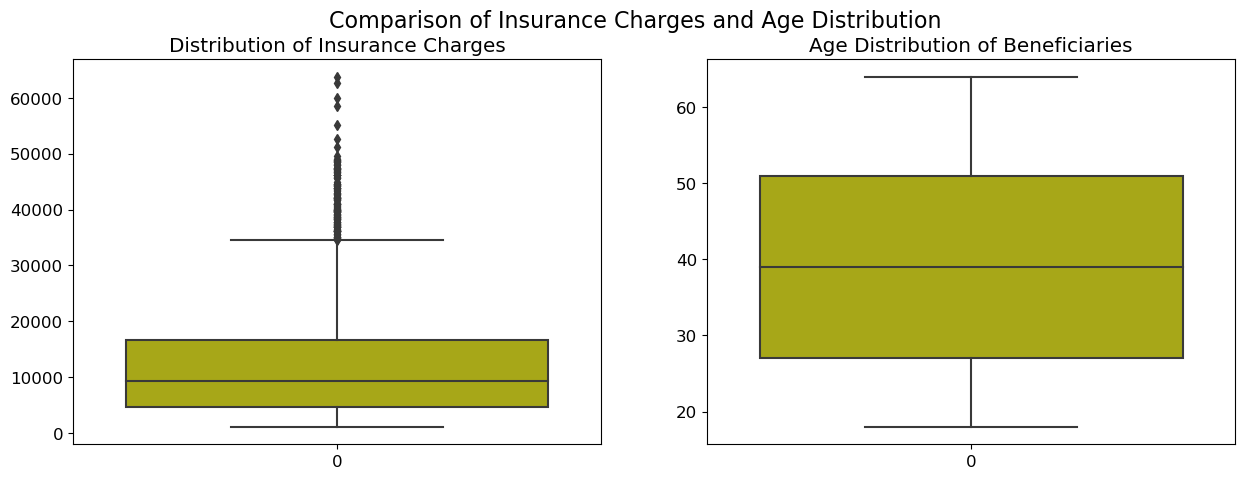

In [35]:
plt.figure(figsize=(15,5))

# Boxplot for charges
plt.subplot(121)
sns.boxplot(df["charges"], color="y")
plt.title('Distribution of Insurance Charges')

# Boxplot for age
plt.subplot(122)
sns.boxplot(df["age"], color="y")
plt.title('Age Distribution of Beneficiaries')

plt.suptitle('Comparison of Insurance Charges and Age Distribution', size=16)
plt.show()

### Analysis:
- The first boxplot (on the left) shows the distribution of insurance charges. The presence of many points above the upper whisker indicates a significant number of outliers, which suggests that some beneficiaries have substantially higher charges compared to the rest.
- The second boxplot (on the right) shows the age distribution of beneficiaries. The boxplot seems symmetric, indicating a relatively even distribution of ages among beneficiaries.

### Interpretation and Insights:
- The wide range and number of outliers in the insurance charges could indicate that there are subpopulations within the beneficiaries that incur very high medical expenses, possibly due to chronic conditions, lifestyle choices (such as smoking), or other factors not captured in the 'age' variable alone.
- The age distribution suggests that the beneficiaries' ages are evenly spread, which is beneficial for risk pooling in insurance.

These boxplots provide a visual summary of the central tendency and dispersion of insurance charges and age. They are especially useful for identifying outliers and understanding the distribution of data. The comparison underscores the diversity in charges among beneficiaries, which could be explored further with additional variables to understand the factors contributing to the high costs for certain individuals.

---

We create heatmap to visualize a cross-tabulation of the number of children by the age of insurance beneficiaries.

### Code Description:
The code uses Pandas to create a cross-tabulation matrix and Seaborn to visualize this matrix as a heatmap.

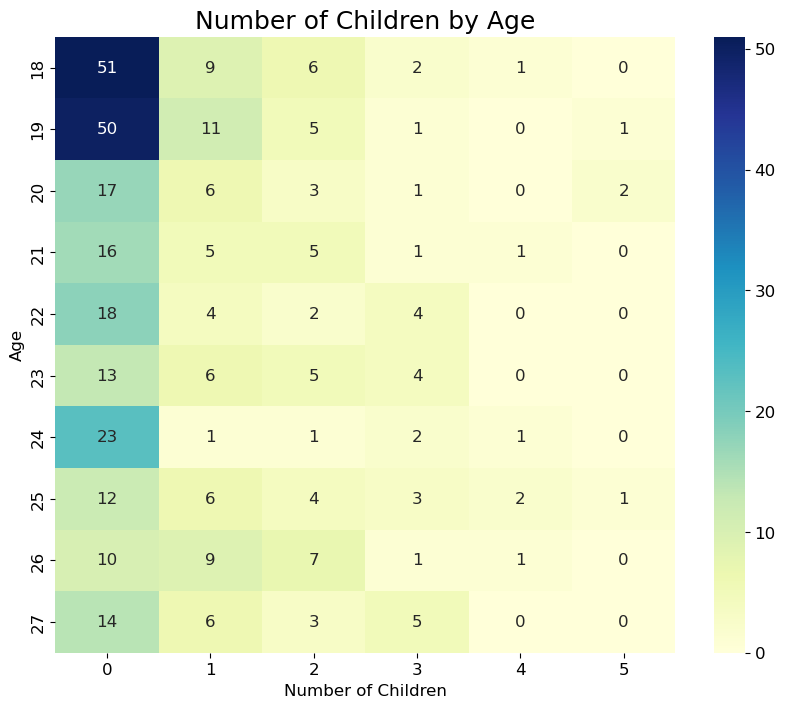

In [36]:
# Create the cross-tabulation
age_children_crosstab = pd.crosstab(df.age, df.children)

# Visualize the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(age_children_crosstab[:10], annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Children by Age', size=18)
plt.ylabel('Age')
plt.xlabel('Number of Children')
plt.show()

### Output Analysis:
- The heatmap displays the counts of beneficiaries by age (vertical axis) against the number of children (horizontal axis) they have.
- Darker shades indicate higher counts, while lighter shades indicate lower counts.
- Annotations within the cells show the exact count of beneficiaries for each combination of age and number of children.

### Interpretation and Insights:
- There seems to be a concentration of beneficiaries aged 18 and 19 with no children, as these ages show the darkest shades with the highest counts.
- As age increases, the distribution becomes more spread out across the number of children, suggesting that older beneficiaries have a more diverse range of family sizes.
- The heatmap provides a quick visual understanding of the relationship between the age of beneficiaries and their family sizes. 

This heatmap is a useful tool for demographic analysis, revealing patterns and concentrations that might not be evident from raw data. It can inform decisions related to targeting specific age groups for family-related insurance plans or understanding the demographic distribution of the insured population.

---

### Data Filtering:
- The data for 18-year-old female and male beneficiaries with more than zero children has been isolated to observe the charges incurred by this specific demographic.

In [37]:
df[(df["age"]==18)&(df["sex"]=="female")&(df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


In [38]:
df[(df["age"]==18)&(df["sex"]=="male")&(df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
710,18,male,too_heavy,1,no,southeast,1727.54000
938,18,male,heavy,2,no,southeast,2304.00220
1023,18,male,normal,1,no,southeast,1711.02680
1080,18,male,normal,2,no,southeast,11884.04858
1170,18,male,heavy,1,yes,northeast,17178.68240


### Outlier Detection:
- The `LocalOutlierFactor` algorithm has been applied to detect outliers in the data based on the age and number of children.
- The scores produced by the algorithm have been used to filter the data, isolating entries that are considered outliers.

In [39]:
clf=LocalOutlierFactor(n_neighbors=50)
clf.fit_predict(df[["age","children"]])

array([-1, -1,  1, ...,  1,  1,  1])

In [40]:
clf_scores=clf.negative_outlier_factor_

In [41]:
np.sort(clf_scores)[0:20]

array([-5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -4.59669436e+09, -4.59669436e+09, -4.59669436e+09,
       -4.59669436e+09, -4.59669436e+09, -4.59669436e+09, -1.44867022e+09,
       -1.44867022e+09, -2.00000001e+08, -2.00000001e+08, -2.00000001e+08])

In [42]:
treshold=np.sort(clf_scores)[20]

In [43]:
df[clf_scores<treshold]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
710,18,male,too_heavy,1,no,southeast,1727.54000


In [44]:
df[(df["age"]==18)&(df["children"]>1)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
369,18,male,too_heavy,3,no,northeast,3481.86800
564,18,female,too_heavy,2,no,southeast,2801.25880
938,18,male,heavy,2,no,southeast,2304.00220
1080,18,male,normal,2,no,southeast,11884.04858
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


### Data Cleaning:
- Records for 18-year-olds with any number of children have been dropped from the dataset to possibly clean the data for more accurate analysis or model training.

In [45]:
df.drop(df[(df["age"]==18)&(df["children"]>0)].index,inplace=True)

### Encoding Categorical Data:
- The dataset has been encoded using `pd.get_dummies` to convert categorical variables into a format that can be provided to ML models.

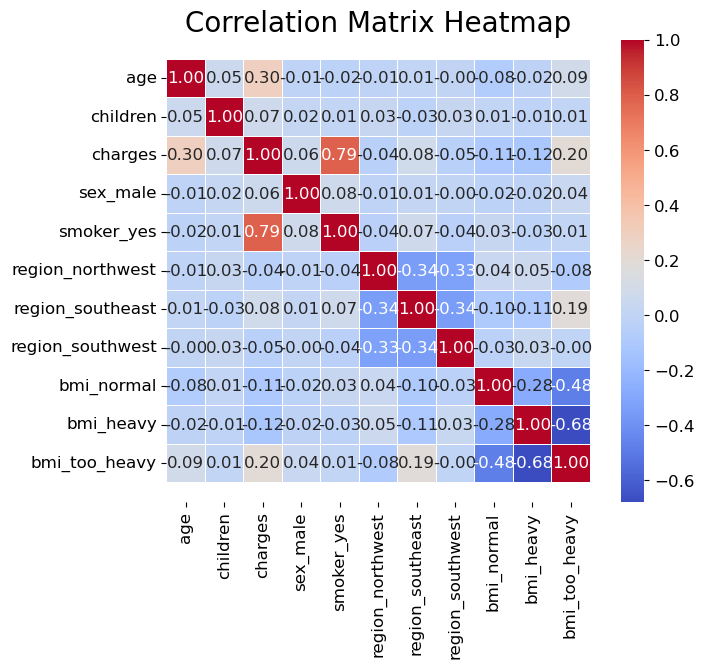

In [46]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region', 'bmi'], drop_first=True)
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

# Show plot
plt.show()


### Correlation Analysis:
- A correlation matrix has been created for the encoded dataset to analyze the relationship between different variables.
- A heatmap has been used to visualize this correlation matrix, providing insights into how various factors such as smoking status, region, and BMI categories are correlated with insurance charges.

### Conclusion and Insights:
- The correlation heatmap reveals significant correlations such as a strong positive correlation between smoking and charges, indicating that smokers tend to have higher insurance charges.
- The negative correlation between age and charges for the age group of 18 may highlight a trend where younger individuals have lower insurance charges, potentially due to lower associated health risks or less comprehensive insurance plans.

### Actionable Insights:
- The analysis can inform insurance companies about the factors that most significantly impact insurance charges.
- It may suggest a focus on creating tailored plans for young adults, especially those with children, and highlight the importance of smoking cessation programs to reduce insurance costs.

### Visualization and Interpretation:
- The heatmap titled 'Correlation Matrix Heatmap' is an effective tool to quickly identify and communicate the strength and direction of relationships between variables.
- The coding of variables as dummy/indicator variables is a standard preprocessing step for machine learning and statistical modeling, allowing for the inclusion of categorical data in such analyses.

This step-by-step approach showcases how data can be explored, cleaned, and analyzed to uncover patterns, with particular emphasis on the use of visualizations to communicate findings. The code provided demonstrates the necessary steps to prepare the data for machine learning algorithms and statistical models, which could be used to predict insurance charges or to evaluate the impact of policy changes.

---

## Analysis of Insurance Charges by Number of Children and Smoking Status

#### Visualization:
The bar chart titled "Average Insurance Charges by Number of Children and Smoking Status" illustrates how smoking status correlates with insurance charges across different family sizes. The chart is distinguished by two sets of bars for each category of children: one representing smokers and the other non-smokers.

This code will display the bar chart with the appropriate title, illustrating the comparison between insurance charges for different numbers of children within smoker and non-smoker groups.

c:\Users\baal_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


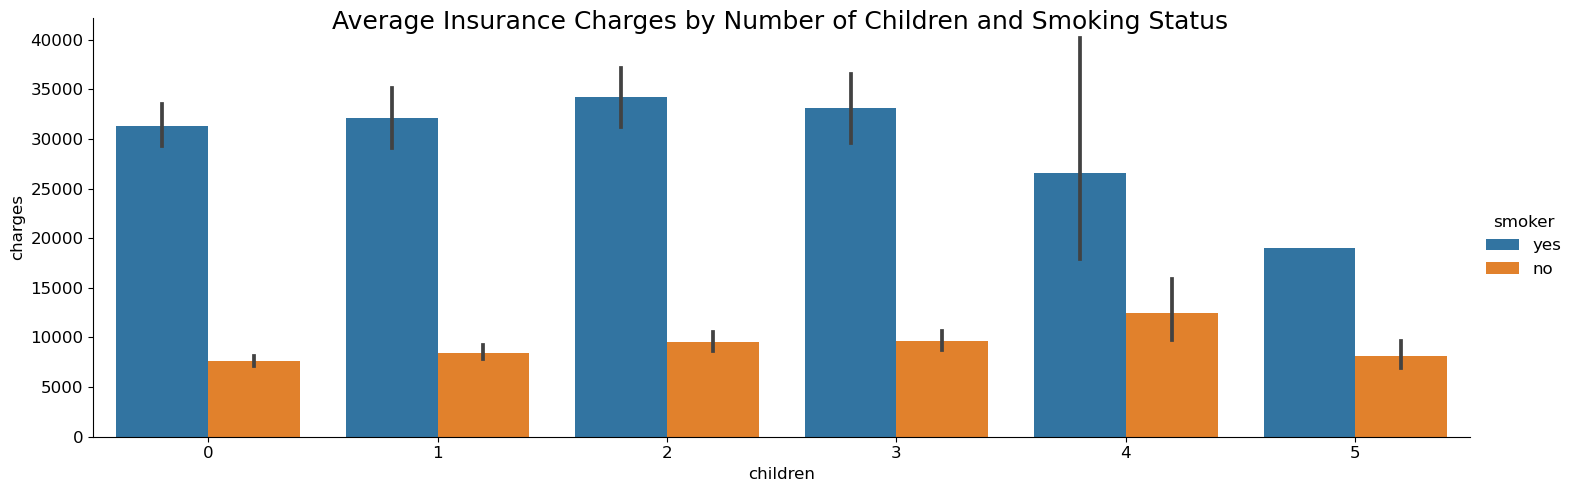

In [47]:
# Create the catplot
g = sns.catplot(x="children", y="charges", hue="smoker", data=df, kind="bar", aspect=3)

# Add a title to the plot
g.fig.suptitle('Average Insurance Charges by Number of Children and Smoking Status', size=18)

# Show the plot
plt.show()

#### Observations:
- The blue bars (smokers) consistently show higher charges than the orange bars (non-smokers), across all categories of the number of children.
- There is a noticeable decrease in charges for families with 5 children, which might suggest a volume discount or other factors that reduce charges for larger families.

#### Statistical Insights:
- The error bars indicate a higher variance in insurance charges for smokers, suggesting a wider range of insurance costs within this group.
- For non-smokers, the variance seems to be less, indicating more consistent charge amounts across individuals.

#### Interpretation:
This pattern implies that smoking is a significant driver of insurance costs, much more so than the number of children. The presence of children does not show a clear trend in terms of increasing or decreasing charges, but the impact of smoking is unequivocal and substantial.

#### Conclusions:
Insurance companies might use this data to adjust their risk assessments and pricing models. Public health initiatives could also leverage these findings to stress the financial benefits of non-smoking, beyond the obvious health advantages.

#### Further Actions:
- A more in-depth analysis could include additional variables to understand the combined effect of age, BMI, and geographical location on insurance charges.
- Longitudinal data could provide insights into whether these trends hold over time or change with age.

---

In [48]:
# # save the cleaned data
# df.to_csv("../Data/insurance_cleaned.csv", index=False)

## Analysis

Analysis of the insurance dataset included exploratory data analysis (EDA), correlation assessment, outlier detection, data encoding, and visualization to understand the factors affecting insurance charges. The data was processed and visualized to identify trends, relationships, and distributions among various demographic and health-related features.

### Key Insights and Conclusions:

- **Smoking Status**: A dominant factor affecting insurance charges; smokers have significantly higher charges than non-smokers, underlining the financial impact of smoking on healthcare costs.
- **Age Factor**: There's a moderate positive correlation between age and charges, indicating higher insurance costs with advancing age, presumably due to increased health risks.
- **BMI Influence**: Higher BMI categories are generally associated with higher insurance charges, emphasizing the health risks and medical costs related to higher BMI.
- **Children Count**: The number of children has a relatively weak correlation with charges, suggesting that it's not a primary driver of insurance costs in the dataset.
- **Regional Variations**: Some variations in charges are observed across different regions, but they do not show a strong effect on insurance costs.
- **Gender Disparity**: Differences in insurance charges based on gender are observed, but they are not as pronounced as those for smoking or BMI.
- **Interactions of Factors**: The interplay of multiple factors - such as age, BMI, smoking status, and region - on insurance charges is complex and warrants a multifaceted approach to risk assessment.

### Methodological Approach:

- **Outlier Detection**: Implemented to identify and manage anomalies in age and children data, enhancing data quality for predictive modeling.
- **Encoding Categorical Data**: Essential for transforming categorical variables into a machine-learning-friendly format, facilitating the inclusion in predictive models.
- **Correlation Matrix**: Provided a clear visualization of how features are interrelated and their strengths of association, guiding feature selection for modeling.

### Visualization and Communication:

- **Heatmaps**: Effectively communicated the strength and direction of relationships between variables, especially in the encoded correlation matrix.
- **Bar Charts and Boxplots**: Offered a clear depiction of the distribution and central tendencies of insurance charges across different subgroups, highlighting the stark contrast in charges between smokers and non-smokers.
- **Density Plots**: Illustrated the distribution of insurance charges across BMI categories and by gender, revealing underlying patterns in the data.

### Implications for Stakeholders:

- **Insurance Companies**: Can use these insights to adjust risk assessments, tailor insurance plans, and consider smoking cessation initiatives as part of wellness programs to manage costs.
- **Healthcare Providers**: May leverage this information to understand the demographic and behavioral factors of their patient population that influence healthcare costs.
- **Policy-Makers**: Can utilize these findings to develop targeted health policies and interventions, especially for high-risk groups such as smokers or those with high BMI.
- **Individuals**: Gain insight into factors that could impact their insurance charges, potentially guiding them toward healthier lifestyle choices to reduce costs.

### Future Directions:

- **Additional Variables**: Incorporating more variables such as health history, diet, exercise, and socio-economic status could provide a more comprehensive understanding of the factors affecting insurance charges.
- **Predictive Modeling**: The identified trends and relationships can be used to build predictive models for insurance charges, which could help in personalizing insurance plans.
- **Longitudinal Studies**: Tracking changes over time could reveal how insurance charges evolve with changing health trends and policy shifts.

In conclusion, the analysis has provided valuable insights into the determinants of insurance charges, highlighting the significant impact of smoking and BMI. These findings can inform more accurate risk modeling and personalized insurance offerings, contribute to healthcare policy-making, and encourage healthier lifestyles among the insured population.

---

## Conclusion

The material presented provides a comprehensive analysis of an insurance dataset, focusing on the interplay of various factors such as age, sex, BMI, number of children, smoking status, and region on insurance charges. Through detailed statistical examination and visualizations, several key findings emerge:

1. **Smoking Status**: A primary determinant of insurance charges; smokers consistently face higher charges than non-smokers across all categories, indicating the substantial financial impact of smoking on healthcare costs.

2. **Age**: There is a moderate correlation between age and insurance charges, suggesting that older individuals typically incur higher costs, likely due to increased health risks.

3. **BMI**: Higher BMI is associated with increased insurance charges, highlighting the importance of weight management in reducing healthcare expenses.

4. **Children**: The number of children a policyholder has shows a weaker correlation with charges, suggesting that while it may impact costs, it is not a primary driver within this dataset.

5. **Regional Differences**: Charges vary slightly by region, but the differences are not pronounced enough to suggest a strong regional influence on insurance costs.

6. **Gender**: Minor disparities in charges between genders are observed, but they are overshadowed by the influence of smoking status and BMI.

7. **Methodology**: Through outlier detection, categorical data encoding, and correlation analysis, the study ensures data quality and relevance, setting the stage for robust predictive modeling.

The study's visualizations—heatmaps, bar charts, boxplots, and density plots—effectively convey the data's distribution, central tendencies, and variations, emphasizing the stark differences in insurance costs between smokers and non-smokers, and among different BMI categories.

For stakeholders:

- **Insurance Companies** can utilize these insights for risk adjustment, personalized plan design, and wellness initiative planning.
- **Healthcare Providers** may use this information for better resource allocation and targeted patient care strategies.
- **Policy-Makers** could apply the findings to guide public health initiatives and insurance regulation.
- **Individuals** can understand the impact of lifestyle choices on insurance costs, potentially motivating healthier behavior.

Future directions include expanding the dataset to include additional health and lifestyle variables, developing predictive models for more personalized insurance pricing, and conducting longitudinal studies to observe changes over time.

In summary, the analysis underscores the significance of lifestyle factors, particularly smoking status and BMI, as influential on insurance charges. The findings advocate for health-conscious decisions and provide a data-driven foundation for stakeholders to make informed choices in insurance-related endeavors.